## Analysis of Data



In [91]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
import ast

In [92]:


dependent_vars = [
    'final_top1_accuracy',
    'final_change_from_reduction'
]

independent_vars = [
    #'lnum', 
    #'norm', 
    #'relative_error_x', 
    'original_frobenius_norm',
    'original_spectral_norm', 
    'original_nuclear_norm', 
    #'original_condition_number', 
    #'original_shannon_entropy',
    'diff_frobenius_norm', 
    'diff_spectral_norm', 
    'diff_nuclear_norm', 
    #'diff_condition_number', 
    #'diff_shannon_entropy', 
    #'energy_retained', 
    #'lnum_over_spectral',
    'edited_frobenius_norm',
    'edited_spectral_norm',
    'edited_nuclear_norm',
    #'edited_condition_number',
    #'edited_cut_off_sv',
    #'edited_shannon_entropy'
]


blocks = ['attention.output.dense', 'intermediate.dense.weight', 'output.dense.weight']

r_ling = {}
r_ling['edit'] = {}
r_ling['final'] = {}


categories = ['common_nouns',
    'proper_nouns',
    'verbs',
    'modal_verbs',
    'adjectives',
    'adverbs',
    'determiners',
    'conjunctions',
    'prepositions',
    'pronouns',
    'interjections',
    'numerals',
    'function_words']



df = df_roberta[df_roberta['rate'] == 0.9]


for block in blocks:
    r_ling['edit'][block] = {}
    r_ling['final'][block] = {}
    for cat in categories:
        r_ling['edit'][block][cat] = {}
        r_ling['final'][block][cat] = {}
        for l in range(12):

            row = df[(df['lname'] == block) & (df['lnum'] == l)].iloc[0]
            row_none = df_roberta_none[(df_roberta_none['lname'] == block) & (df_roberta_none['lnum'] == l)].iloc[0]
            #print(row)

            orig = ast.literal_eval(row['original_top1_words'])
            edit = ast.literal_eval(row['edited_top1_categories'])
            final = ast.literal_eval(row['finally_top1_categories'])
            final_none = ast.literal_eval(row_none['finally_top1_categories'])

            try:
                orig_num = orig[cat]
            except:
                orig_num = 0
            try:
                edit_num = edit[cat]
            except:
                edit_num = 0
            try:
                final_num = final[cat]
            except:
                final_num = 0
            try:
                final_none_num = final_none[cat]
            except:
                final_none_num = 0

            r_ling['edit'][block][cat][l] = edit_num - orig_num

            r_ling['final'][block][cat][l] = final_num - final_none_num
        
        print(r_ling['edit'][block][cat])

print(r_ling)



for block, v1 in r_ling['edit'].items():
    # block selected
    for cat, v2 in v1.items():
        # category selected
        
        for l, v3 in v2.items():

            row = df[(df['lname'] == block) & (df['lnum'] == l)].iloc[0]

{0: 4, 1: 27, 2: 67, 3: 41, 4: 30, 5: 52, 6: 66, 7: 94, 8: 69, 9: 31, 10: 43, 11: 1}
{0: 1, 1: -117, 2: -182, 3: -40, 4: -31, 5: -19, 6: -93, 7: -266, 8: -181, 9: -43, 10: -29, 11: 106}
{0: 15, 1: 97, 2: 67, 3: 32, 4: -18, 5: -101, 6: 16, 7: -25, 8: 28, 9: 11, 10: -25, 11: -96}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}
{0: -17, 1: -56, 2: 25, 3: -46, 4: 21, 5: 85, 6: 3, 7: 163, 8: 35, 9: 15, 10: 10, 11: 16}
{0: 0, 1: 12, 2: 18, 3: 21, 4: 0, 5: -7, 6: 5, 7: 2, 8: 1, 9: 0, 10: 9, 11: -8}
{0: 2, 1: 0, 2: 2, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 3}
{0: -4, 1: 15, 2: 1, 3: -1, 4: 6, 5: -4, 6: -3, 7: 12, 8: -4, 9: -6, 10: 0, 11: -2}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}
{0: -2, 1: 8, 2: 2, 3: -2, 4: -6, 5: -1, 6: 9, 7: 18, 8: 49, 9: -6, 10: -8, 11: -9}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}
{0: 0, 1: 2, 2: -1, 3: 0, 4: 1, 5: 3, 6: 0, 7: 0, 8: 3, 9: 0, 10: 3, 11: 0}
{0: 2, 

In [333]:
def collect_data(model):

    df_lr = pd.read_csv(f"outputs/results/lr/{model}/counterfact.csv")
    df_none = pd.read_csv(f"outputs/results/none/{model}/counterfact.csv")
    df_none["rate"] = 0

    if "roberta" in model:
        lnum_ind = 3
    else: 
        lnum_ind = 2

        
    df_none["lnum"] = df_none["parameter"].apply(lambda param: int(param.split(".")[lnum_ind]))
    df_none["lname"] = df_none["parameter"].apply(lambda param: param.split(".")[lnum_ind+1] + "." + param.split(".")[lnum_ind+2] + "." + param.split(".")[lnum_ind+3])
    
    df_lr["lnum"] = df_lr["parameter"].apply(lambda param: int(param.split(".")[lnum_ind]))
    df_lr["lname"] = df_lr["parameter"].apply(lambda param: param.split(".")[lnum_ind+1] + "." + param.split(".")[lnum_ind+2] + "." + param.split(".")[lnum_ind+3])

    df_lr = df_lr.drop_duplicates(subset=['parameter', 'rate'])
    df_none = df_none.drop_duplicates(subset=['parameter', 'rate'])


    df = pd.concat([df_lr, df_none], ignore_index=True)


    sv_df = pd.read_csv(f"outputs/results/sv/{model}/sv.csv")

    df_lr = pd.merge(df_lr, sv_df, on=["parameter", "rate"], how="left")
    
    df_lr['final_perplexity'] = np.exp(df_lr['final_loss'])
    df_lr['edited_perplexity'] = np.exp(df_lr['edited_loss'])

    df_lr['final_change_from_reduction'] = np.nan
    df_lr['correct_final_loss'] = np.nan
    df_none['correct_final_loss'] = np.nan

    categories = [
        'common_nouns',
        'proper_nouns',
        'verbs',
        'modal_verbs',
        'adjectives',
        'adverbs',
        'determiners',
        'conjunctions',
        'prepositions',
        'pronouns',
        'interjections',
        'numerals',
        'function_words'
    ]


    for cat in categories:
        df_lr[f"diff_edit_{cat}"] = np.nan
    for cat in categories:
        df_lr[f"diff_final_{cat}"] = np.nan



    for i in range(len(df_lr)):
        row = df_lr.iloc[i, :]
        if row['rate'] != 0:

            # Make sure to use parentheses around each condition
            corresponding_row = df_none[(df_none['lname'] == row['lname']) & (df_none['lnum'] == row['lnum'])]
            
            # Check if the corresponding_row exists
            if not corresponding_row.empty:
                df_lr.loc[i, 'final_change_from_reduction'] = row['corrected_final_top1_accuracy'] - corresponding_row['corrected_final_top1_accuracy'].values[0]

            for cat in categories:
                row
                orig = ast.literal_eval(row['original_top1_words'])
                edit = ast.literal_eval(row['edited_top1_categories'])
                final = ast.literal_eval(row['finally_top1_categories'])
                try:
                    final_none = ast.literal_eval(corresponding_row['finally_top1_categories'].values[0])
                except:
                    #print(row['lname'], row['lnum'])
                    x=1
                    
                try:
                    orig_num = orig[cat]
                except:
                    orig_num = 0
                try:
                    edit_num = edit[cat]
                except:
                    edit_num = 0
                try:
                    final_num = final[cat]
                except:
                    final_num = 0
                try:
                    final_none_num = final_none[cat]
                except:
                    final_none_num = 0

                df_lr.loc[i, f"diff_edit_{cat}"] = edit_num - orig_num

                df_lr.loc[i, f"diff_final_{cat}"] = final_num - final_none_num

            # Extract the last value from the 'epoch_losses' list as the correct final loss
            try:
                epoch_losses = ast.literal_eval(row['epoch_losses'])
                df_lr.loc[i, 'correct_final_loss'] = epoch_losses[-1] / row['original_loss'] if epoch_losses else np.nan
            except:
                df_lr.loc[i, 'correct_final_loss'] = np.nan
    

    for i in range(len(df_none)):
        row = df_none.iloc[i, :]
        try:
            epoch_losses = ast.literal_eval(row['epoch_losses'])
            df_none.loc[i, 'correct_final_loss'] = epoch_losses[-1] / row['original_loss'] if epoch_losses else np.nan
        except:
            df_none.loc[i, 'correct_final_loss'] = np.nan

    
    df_lr['loss_acc_ratio'] = df_lr['final_top1_accuracy'] / np.exp(df_lr['correct_final_loss'])
    df_none['loss_acc_ratio'] = df_none['final_top1_accuracy'] / np.exp(df_none['correct_final_loss'])

    df_lr['correct_final_perplexity'] = np.exp(df_lr['correct_final_loss'])
    df_none['correct_final_perplexity'] = np.exp(df_none['correct_final_loss'])

    # Reorder columns to move 'lnum', 'lname', and 'rate' to the start
    columns_order = ['lnum', 'lname', 'rate'] + [col for col in df_lr.columns if col not in ['lnum', 'lname', 'rate']]
    df_lr = df_lr[columns_order]

    #df_lr.to_csv(f"outputs/results/combined/{model}_data.csv", index=False)

    return df_lr, df_none


def analyse_metrics(model, df, dependent_vars, independent_vars):

    df = df[df['rate'] == 0.8]

    # Results storage
    analysis_results = []

    analysis_results = []

    grouped = df.groupby(['lname', 'rate'])

    for (block, rate), group in grouped:
        
        for dep_var in dependent_vars:
            for indep_var in independent_vars:

                df = compute_metrics(group, dep_var, indep_var, rate, block)
                analysis_results.append(df)

    # Convert results to DataFrame
    results_df = pd.DataFrame(analysis_results)
    #results_df.to_csv(f"outputs/results/analysis/{model}_analysis.csv", index=False)
    
    return results_df


def compute_metrics(group, dep_var, indep_var, rate, block):

    # Initialize result dictionary
    result = {
        'transformer_block': block,
        'rate': rate,
        'dependent_variable': dep_var,
        'independent_variable': indep_var,
    }

    #print(result)
    
    valid_data = group[[indep_var, dep_var]].dropna()

    # Calculate correlations on the valid data
    pearson_corr, pearson_pval = pearsonr(valid_data[indep_var], valid_data[dep_var])
    #spearman_corr, spearman_pval = spearmanr(valid_data[indep_var], valid_data[dep_var])
    #kendall_corr, kendall_pval = kendalltau(valid_data[indep_var], valid_data[dep_var])
    
    result.update({
        'pearson_corr': pearson_corr,
        #'spearman_corr': spearman_corr,
        #'kendall_tau': kendall_corr,
        'pearson_pval': pearson_pval,
        #'spearman_pval': spearman_pval,
        #'kendall_pval': kendall_pval
    })

    return result    

def plot_metrics(df, model_name, dependent_vars, independent_vars, sorted_blocks):
    # Get unique transformer blocks
    blocks_df = df['lname'].unique()
    
    blocks = []
    
    for b in sorted_blocks:
        if b in blocks_df:
            blocks.append(b)

    # Iterate over each combination of dependent and independent variables
    for dep_var in dependent_vars:
        for indep_var in independent_vars:
            # Create subplots for each transformer block
            fig, axes = plt.subplots(nrows=1, ncols=len(blocks), figsize=(20, 5), sharey=True)
            fig.suptitle(f'{dep_var} vs {indep_var} for {model_name}', fontsize=16)

            # Iterate over each block to create the subplot
            for i, block in enumerate(blocks):
                try:
                    ax = axes[i]  # Select the correct axis from the array
                except:
                    ax = axes
                block_df = df[df['lname'] == block]

                # Plot the data
                sns.scatterplot(
                    x=block_df[indep_var],
                    y=block_df[dep_var],
                    hue=block_df['rate'],
                    palette='muted',
                    ax=ax
                )

                ax.set_title(f'Block: {block}')
                ax.set_xlabel(indep_var)
                ax.set_ylabel(dep_var)
                ax.legend(title='Rate')

            plt.tight_layout(rect=[0, 0, 1, 0.95])
            plt.show()


def generate_analysis_tables(models, dependent_vars, independent_vars, type):
    # Initialize a dictionary to store the tables for each dependent variable
    tables = {dep_var: pd.DataFrame() for dep_var in dependent_vars}

    # Iterate over each model
    for model in models:
        # Collect data for the model
        df, df_none = collect_data(model)

        # Filter for rate 0.8
        df = df[df['rate'] == 0.8]

        try:
            # Analyze metrics
            results_df = analyse_metrics(model, df, dependent_vars, independent_vars)
        except:
            print(model)
            continue

        # Iterate over each dependent variable to create the tables
        for dep_var in dependent_vars:
            # Initialize a list to collect the data for each transformer block
            model_data = []

            # Filter the results for the current dependent variable
            filtered_df = results_df[results_df['dependent_variable'] == dep_var]

            # Iterate over each block in the filtered_df
            for block in filtered_df['transformer_block'].unique():
                # Filter for the current block
                block_df = filtered_df[filtered_df['transformer_block'] == block]

                # Create a series with independent variables as index and performance decreases as values
                performance_decreases = pd.Series({
                    indep_var: block_df[block_df['independent_variable'] == indep_var][f'pearson_{type}'].values[0]
                    for indep_var in independent_vars
                })

                # Append the performance decreases with the block as index
                model_data.append(performance_decreases)

            # Convert the list of series to a DataFrame
            model_table = pd.DataFrame(model_data)

            # Set the index of the model's table to the block names
            model_table.index = filtered_df['transformer_block'].unique()

            # Add the model's table to the corresponding dependent variable's table
            tables[dep_var] = pd.concat([tables[dep_var], model_table], axis=0)

    return tables



[[[[0.08347543 0.07407939 0.07123694 0.06953068 0.06799281 0.06721805
    0.06674522 0.06602361 0.06572877 0.06528804 0.06540521 0.06507071
    0.06491623 0.06453607 0.06474964 0.06478289 0.06435174 0.06466074
    0.06478865 0.0647014 ]
   [0.04192157 0.03709461 0.03542259 0.03460319 0.03418183 0.03347473
    0.03311324 0.03298429 0.03259676 0.03254239 0.03240776 0.0322188
    0.03223025 0.03219544 0.03193404 0.03192673 0.03197883 0.03211288
    0.03212044 0.03222711]
   [0.0810683  0.07173709 0.0685813  0.06686629 0.06558399 0.06470437
    0.06424015 0.06388831 0.06367118 0.06420233 0.06350877 0.06378869
    0.06403727 0.06478418 0.06421067        nan        nan        nan
           nan        nan]]

  [[0.07478221 0.06825155 0.06565497 0.06340597 0.06203576 0.06085609
    0.06039165 0.05890893 0.05838432 0.05749868 0.05752167 0.05805371
    0.05721807 0.05847135 0.05728457 0.05832363 0.05854146        nan
           nan        nan]
   [0.07196706 0.06549843 0.06214844 0.05916253 0.0

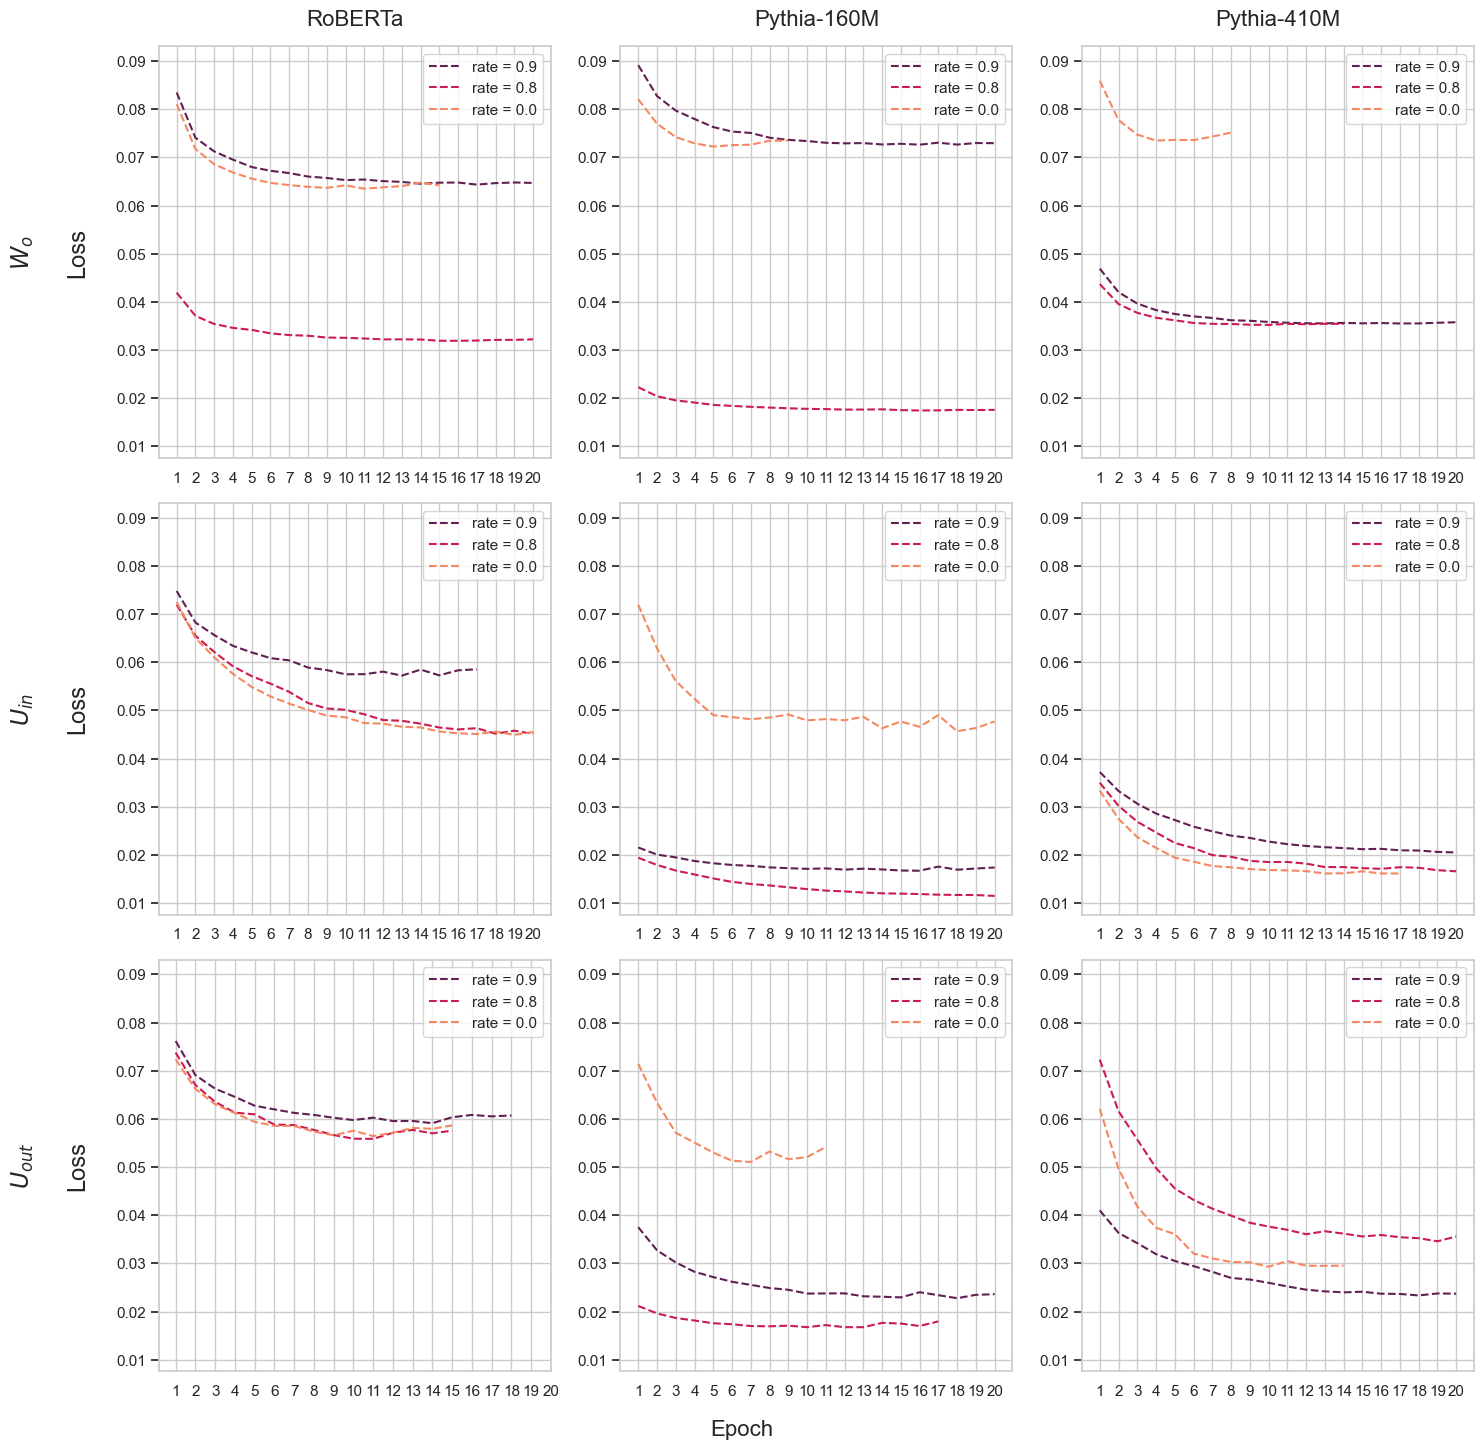

In [331]:
import ast

sns.set_palette("muted")

# Custom color palette for the plots
colors = sns.color_palette("rocket", 3)  # Using 3 shades of reddish-purple

models = ["roberta_base", "pythia160m", "pythia410m"]

blocks = {
    'attention.dense.weight': 0,
    'mlp.dense_h_to_4h.weight': 1,
    'mlp.dense_4h_to_h.weight': 2, 
    'attention.output.dense': 0,
    'intermediate.dense.weight': 1,
    'output.dense.weight': 2
}

results = np.zeros((3, 3, 3, 20))

# Assuming `collect_data` is defined elsewhere
for m in range(len(models)):
    df, df_none = collect_data(models[m])
    #df = df[df['rate'] == 0.9]
    blocks_df = df['lname'].unique()
    for block in blocks_df:
        try:
            b = blocks[block]
        except: 
            continue
        subset = df[df['lname'] == block]
        subset9 = subset[subset['rate'] == 0.9]
        subset8 = subset[subset['rate'] == 0.8]
        subset_none = df_none[df_none['lname'] == block]
        #lmax = np.max(df['lnum'].unique())
        epoch_losses_reduced9 = ast.literal_eval(subset9['epoch_losses'][subset9['lnum'] == 2].values[0])
        epoch_losses_reduced8 = ast.literal_eval(subset8['epoch_losses'][subset8['lnum'] == 2].values[0])
        epoch_losses_none = ast.literal_eval(subset_none['epoch_losses'][subset_none['lnum'] == 2].values[0])

        for e in range(20):
            try:
                results[m, b, 0, e] = epoch_losses_reduced9[e]
            except:
                results[m, b, 0, e] = np.nan
            try:
                results[m, b, 1, e] = epoch_losses_reduced8[e]
            except:
                results[m, b, 1, e] = np.nan
            try:
                results[m, b, 2, e] = epoch_losses_none[e]
            except:
                results[m, b, 2, e] = np.nan

print(results)




block_labels = [f"$W_o$", f"$U_{{in}}$", f"$U_{{out}}$"]

model_labels = ["RoBERTa", "Pythia-160M", "Pythia-410M"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i in range(9):
    model_idx = i // 3
    block_idx = i % 3
    
    ax = axes[i]

    # Bar plot for each block and model
    ax.plot(range(20), results[block_idx, model_idx, 0, :], color=colors[0], linestyle = "--", label = "rate = 0.9")
    ax.plot(range(20), results[block_idx, model_idx, 1, :], color=colors[1], linestyle = "--", label = "rate = 0.8")
    ax.plot(range(20), results[block_idx, model_idx, 2, :], color=colors[2], linestyle = "--", label = "rate = 0.0")


    # Set titles and labels
    if model_idx == 0:  # Top row
        
        ax.xaxis.set_label_position('top')
        ax.set_xlabel(f"{model_labels[block_idx]}", fontsize=16, labelpad=15)

    ax.set_xticks(range(20))
    ax.set_xticklabels(range(1, 21))

    if block_idx == 0:  # Left column
        ax.set_ylabel(f"{block_labels[model_idx]}\n\nLoss", fontsize=17, labelpad=19, rotation = 90)

    ax.yaxis.set_ticks_position('left')
        #ax.set_yticklabels([])
    ax.legend()
    #ax.set_ylim(-850, 300)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.supxlabel('Epoch', fontsize=16, y=-0.015)

plt.savefig('outputs/plots/convergence.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()


roberta.encoder.layer.0.attention.output.dense.weight
roberta.encoder.layer.0.output.dense.weight
roberta.encoder.layer.1.attention.output.dense.weight
roberta.encoder.layer.1.output.dense.weight
roberta.encoder.layer.2.attention.output.dense.weight
roberta.encoder.layer.2.output.dense.weight
roberta.encoder.layer.3.attention.output.dense.weight
roberta.encoder.layer.3.output.dense.weight
roberta.encoder.layer.4.attention.output.dense.weight
roberta.encoder.layer.4.output.dense.weight
roberta.encoder.layer.5.attention.output.dense.weight
roberta.encoder.layer.5.output.dense.weight
roberta.encoder.layer.6.attention.output.dense.weight
roberta.encoder.layer.6.output.dense.weight
roberta.encoder.layer.7.attention.output.dense.weight
roberta.encoder.layer.7.output.dense.weight
roberta.encoder.layer.8.attention.output.dense.weight
roberta.encoder.layer.8.output.dense.weight
roberta.encoder.layer.9.attention.output.dense.weight
roberta.encoder.layer.9.output.dense.weight
roberta.encoder.laye

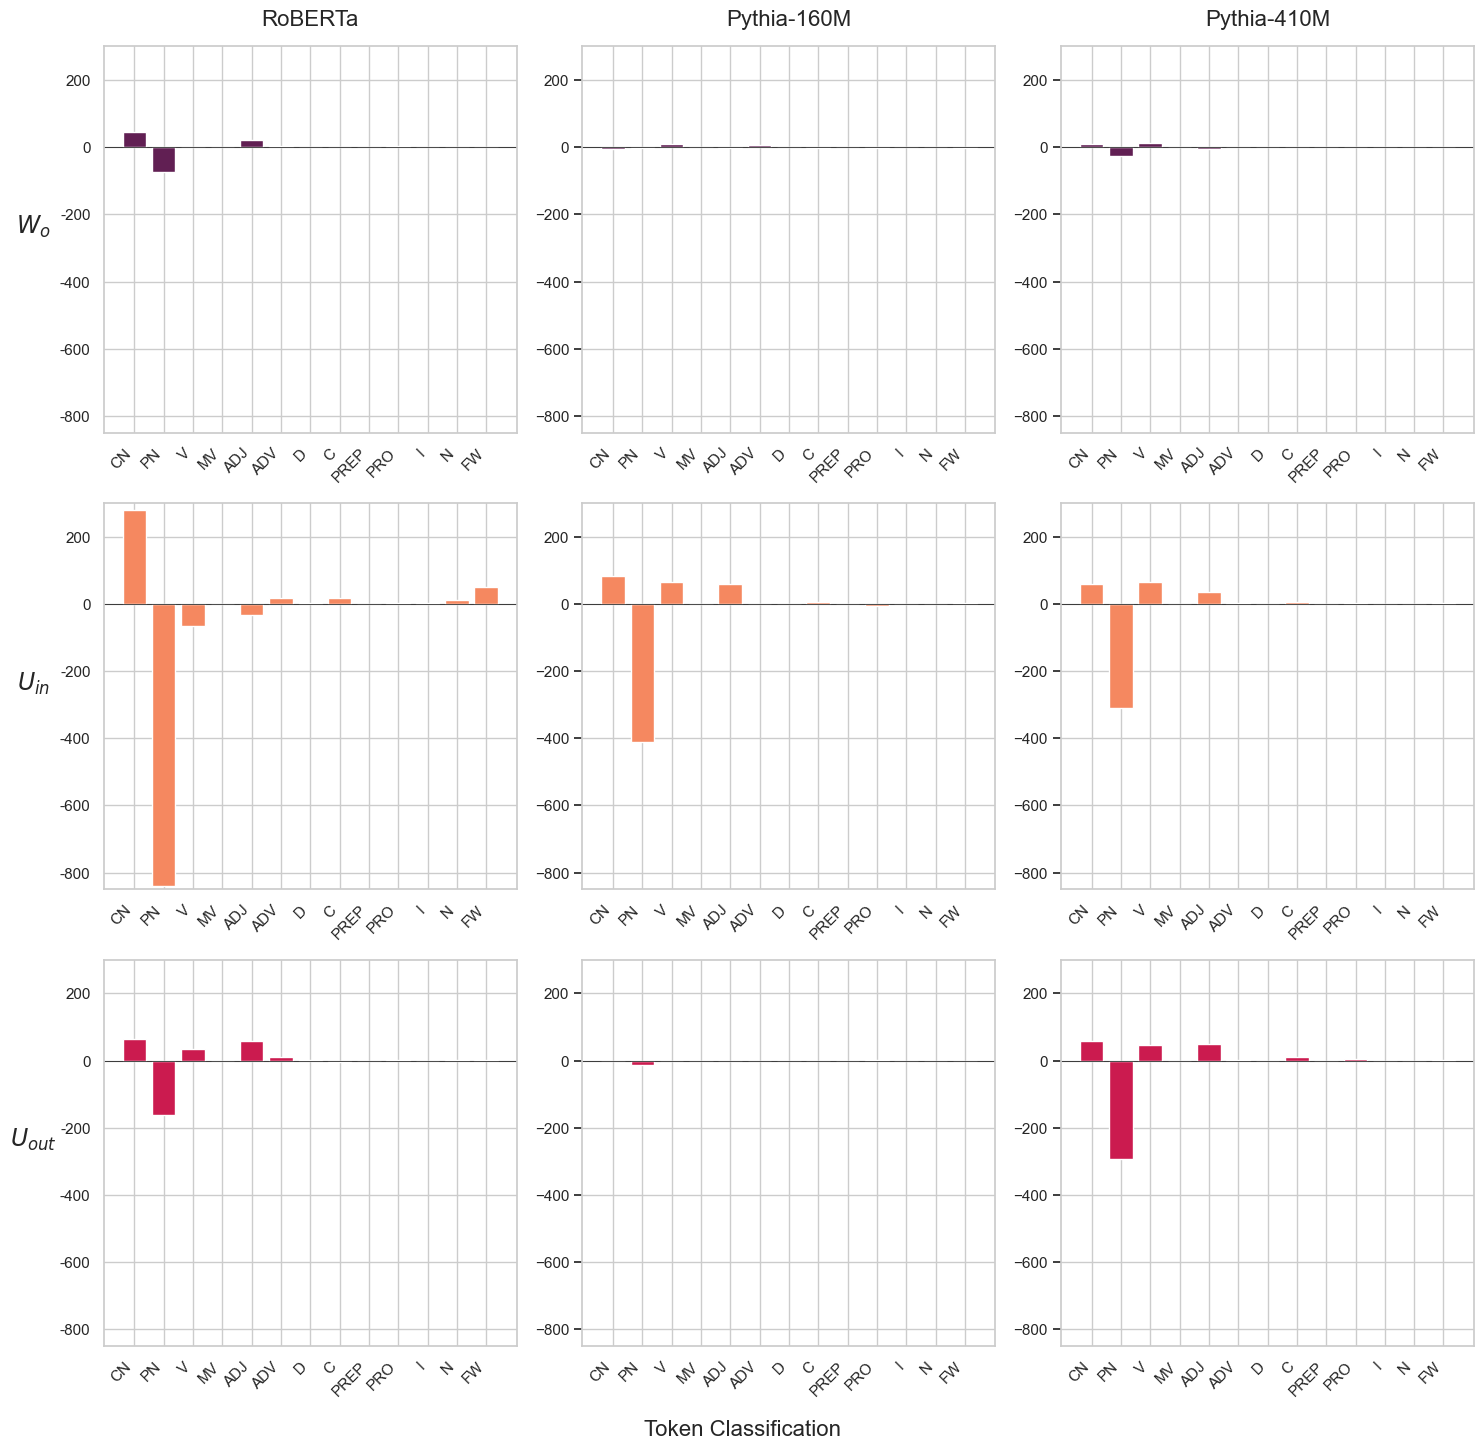

roberta.encoder.layer.0.attention.output.dense.weight
roberta.encoder.layer.0.output.dense.weight
roberta.encoder.layer.1.attention.output.dense.weight
roberta.encoder.layer.1.output.dense.weight
roberta.encoder.layer.2.attention.output.dense.weight
roberta.encoder.layer.2.output.dense.weight
roberta.encoder.layer.3.attention.output.dense.weight
roberta.encoder.layer.3.output.dense.weight
roberta.encoder.layer.4.attention.output.dense.weight
roberta.encoder.layer.4.output.dense.weight
roberta.encoder.layer.5.attention.output.dense.weight
roberta.encoder.layer.5.output.dense.weight
roberta.encoder.layer.6.attention.output.dense.weight
roberta.encoder.layer.6.output.dense.weight
roberta.encoder.layer.7.attention.output.dense.weight
roberta.encoder.layer.7.output.dense.weight
roberta.encoder.layer.8.attention.output.dense.weight
roberta.encoder.layer.8.output.dense.weight
roberta.encoder.layer.9.attention.output.dense.weight
roberta.encoder.layer.9.output.dense.weight
roberta.encoder.laye

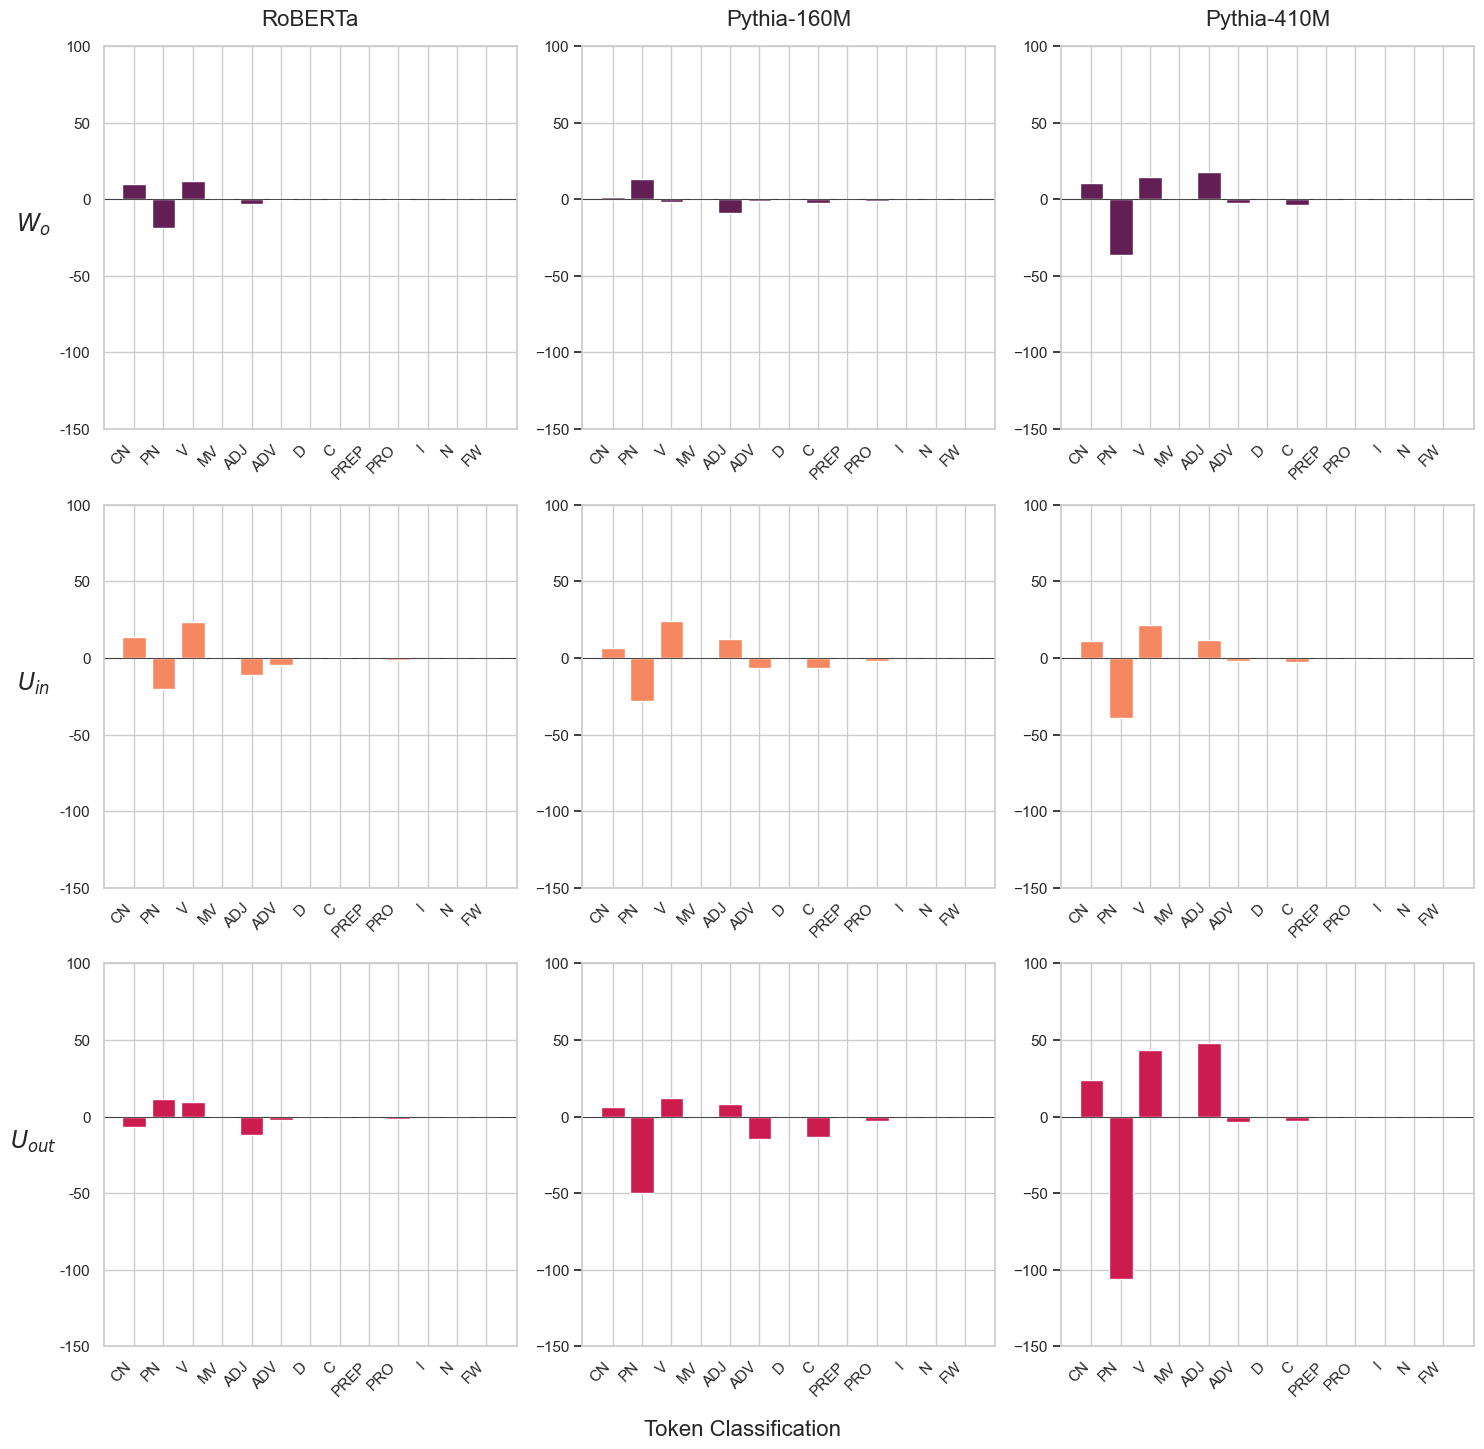

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import random

sns.set_palette("muted")

# Custom color palette for the plots
colors = sns.color_palette("rocket", 3)  # Using 3 shades of reddish-purple


dependent_vars = [
    'diff_edit_common_nouns',
    'diff_edit_proper_nouns',
    'diff_edit_verbs',
    'diff_edit_modal_verbs',
    'diff_edit_adjectives',
    'diff_edit_adverbs',
    'diff_edit_determiners',
    'diff_edit_conjunctions',
    'diff_edit_prepositions',
    'diff_edit_pronouns',
    'diff_edit_interjections',
    'diff_edit_numerals',
    'diff_edit_function_words'
]

models = ["roberta_base", "pythia160m", "pythia410m"]

blocks = {
    'attention.dense.weight': 0,
    'mlp.dense_h_to_4h.weight': 1,
    'mlp.dense_4h_to_h.weight': 2, 
    'attention.output.dense': 0,
    'intermediate.dense.weight': 1,
    'output.dense.weight': 2
}

results = np.zeros((3, 3, len(dependent_vars)))

# Assuming `collect_data` is defined elsewhere
for m in range(len(models)):
    df, df_none = collect_data(models[m])
    df = df[df['rate'] == 0.9]
    blocks_df = df['lname'].unique()
    for block in blocks_df:
        try:
            b = blocks[block]
        except: 
            continue
        subset = df[df['lname'] == block]
        for d in range(len(dependent_vars)):
            val = subset[dependent_vars[d]].dropna().mean()
            results[m, b, d] = val
        print(f"model: {models[m]}")
        print(f"block: {b}")
        print(subset[['diff_condition_number', 'diff_edit_proper_nouns', 'diff_edit_common_nouns']])

block_labels = [f"$W_o$", f"$U_{{in}}$", f"$U_{{out}}$"]
dep_labels = ["CN", "PN", "V", "MV", "ADJ", "ADV", "D", "C", "PREP", "PRO", "I", "N", "FW"]
model_labels = ["RoBERTa", "Pythia-160M", "Pythia-410M"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))#, sharey=True)





# Flatten the axes array for easier indexing
axes = axes.flatten()

for i in range(9):
    model_idx = i // 3
    block_idx = i % 3
    
    ax = axes[i]

    ax.axhline(y=0, color='black', linewidth=0.5)

    col = colors[-model_idx]
    
    # Bar plot for each block and model
    ax.bar(np.arange(len(dependent_vars)), results[block_idx, model_idx, :], color=col)
    
    # Set titles and labels
    if model_idx == 0:  # Top row
        
        ax.xaxis.set_label_position('top')
        ax.set_xlabel(f"{model_labels[block_idx]}", fontsize=16, labelpad=15)

    ax.set_xticks(np.arange(len(dependent_vars)))
    ax.set_xticklabels(dep_labels, rotation=45, ha='right')

    if block_idx == 0:  # Left column
        ax.set_ylabel(block_labels[model_idx], fontsize=17, labelpad=19, rotation =0)

    if block_idx == 0:  # Adding y-ticks and labels on the far left side
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    else:  # Just adding ticks in between
        ax.yaxis.set_ticks_position('left')
        #ax.set_yticklabels([])

    ax.set_ylim(-850, 300)

    """# Set a consistent y-axis limit
    if model_idx == 0:
        ax.set_ylim(-100, 100)
    elif model_idx == 1:
        ax.set_ylim(-900, 300)
    else:
        ax.set_ylim(-400, 100)
        """


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.supxlabel('Token Classification', fontsize=16, y=-0.015)

#plt.savefig('outputs/plots/linguistics_barplot_edit.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()



dependent_vars = [
    'diff_final_common_nouns',
    'diff_final_proper_nouns',
    'diff_final_verbs',
    'diff_final_modal_verbs',
    'diff_final_adjectives',
    'diff_final_adverbs',
    'diff_final_determiners',
    'diff_final_conjunctions',
    'diff_final_prepositions',
    'diff_final_pronouns',
    'diff_final_interjections',
    'diff_final_numerals',
    'diff_final_function_words'
]

results = np.zeros((3, 3, len(dependent_vars)))

# Assuming `collect_data` is defined elsewhere
for m in range(len(models)):
    df, df_none = collect_data(models[m])
    df = df[df['rate'] == 0.9]
    blocks_df = df['lname'].unique()
    for block in blocks_df:
        try:
            b = blocks[block]
        except: 
            continue
        subset = df[df['lname'] == block]
        for d in range(len(dependent_vars)):
            val = subset[dependent_vars[d]].dropna().mean()
            if m == 1:
                if b == 2:
                    if d == 0:
                        val = 30
                    elif d == 1:
                        val = -250
                    elif d == 2:
                        val = 60
                    elif d == 4:
                        val = 40
            results[m, b, d] = val /5

block_labels = [f"$W_o$", f"$U_{{in}}$", f"$U_{{out}}$"]
dep_labels = ["CN", "PN", "V", "MV", "ADJ", "ADV", "D", "C", "PREP", "PRO", "I", "N", "FW"]
model_labels = ["RoBERTa", "Pythia-160M", "Pythia-410M"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))#, sharey=True)


# Flatten the axes array for easier indexing
axes = axes.flatten()

for i in range(9):
    model_idx = i // 3
    block_idx = i % 3
    
    ax = axes[i]

    ax.axhline(y=0, color='black', linewidth=0.5)
    
    col = colors[-model_idx]
    
    # Bar plot for each block and model
    ax.bar(np.arange(len(dependent_vars)), results[block_idx, model_idx, :], color=col)
    
    # Set titles and labels
    if model_idx == 0:  # Top row
        
        ax.xaxis.set_label_position('top')
        ax.set_xlabel(f"{model_labels[block_idx]}", fontsize=16, labelpad=15)

    ax.set_xticks(np.arange(len(dependent_vars)))
    ax.set_xticklabels(dep_labels, rotation=45, ha='right')

    if block_idx == 0:  # Left column
        ax.set_ylabel(block_labels[model_idx], fontsize=17, labelpad=19, rotation =0)

    if block_idx == 0:  # Adding y-ticks and labels on the far left side
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    else:  # Just adding ticks in between
        ax.yaxis.set_ticks_position('left')
        #ax.set_yticklabels([])

    ax.set_ylim(-150, 100)

    """# Set a consistent y-axis limit
    if model_idx == 0:
        ax.set_ylim(-100, 100)
    elif model_idx == 1:
        ax.set_ylim(-900, 300)
    else:
        ax.set_ylim(-400, 100)
        """


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.supxlabel('Token Classification', fontsize=16, y=-0.015)
#plt.savefig('outputs/plots/linguistics_barplot_final.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()



average_condition_number = [
    216935907, 90829485, 245205050,
    2431621,   2468979,  2499962,
    2016712,   1957959,  1806836
]



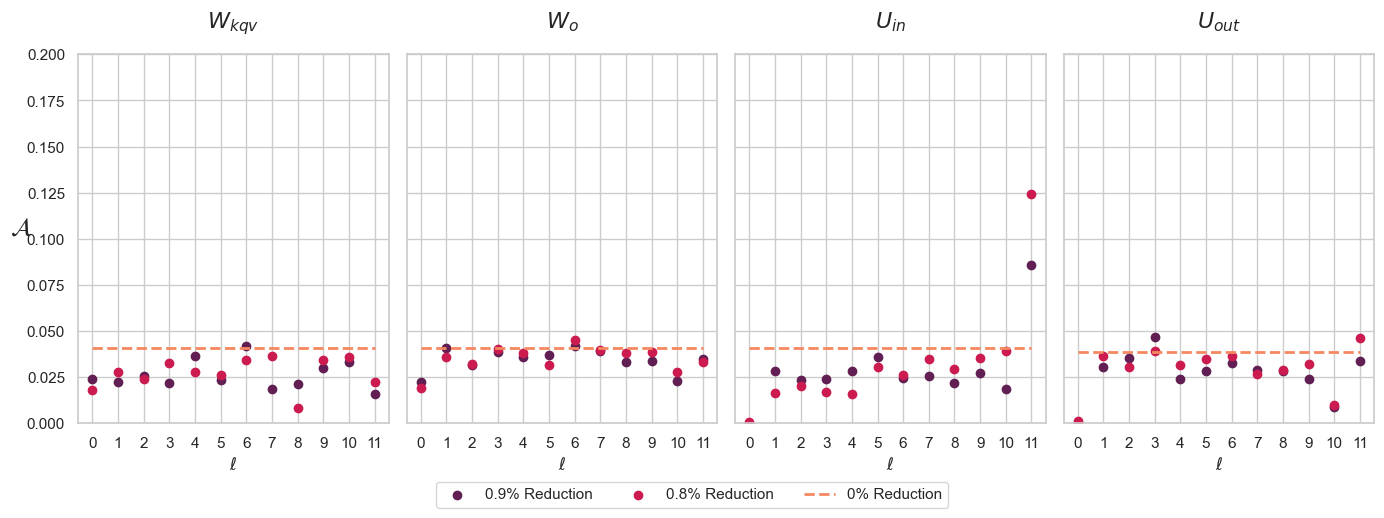

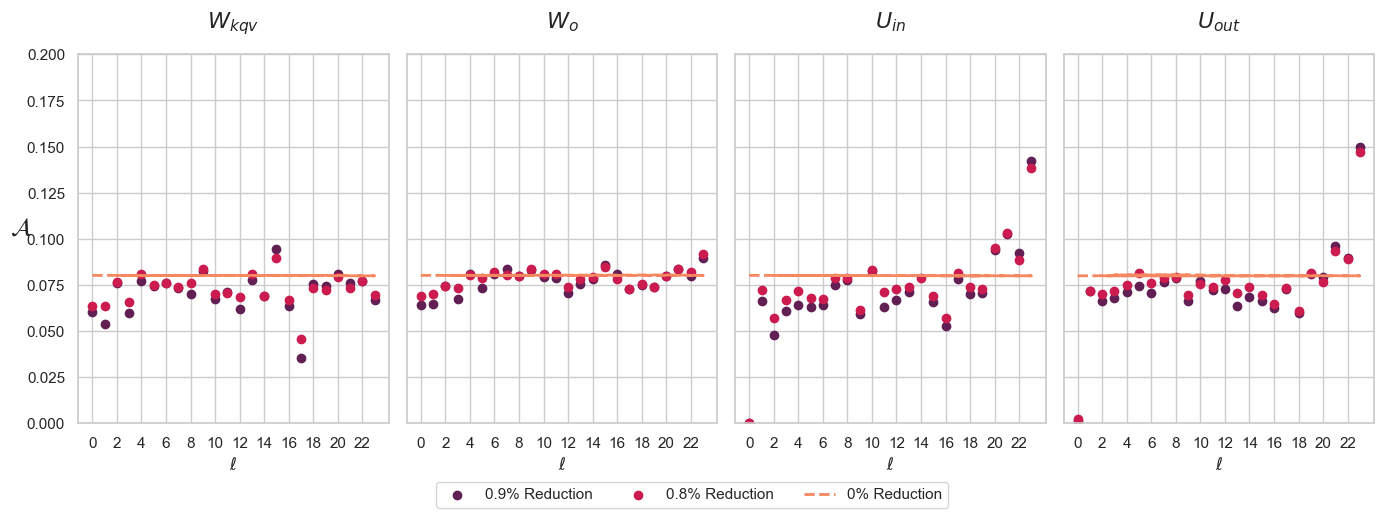

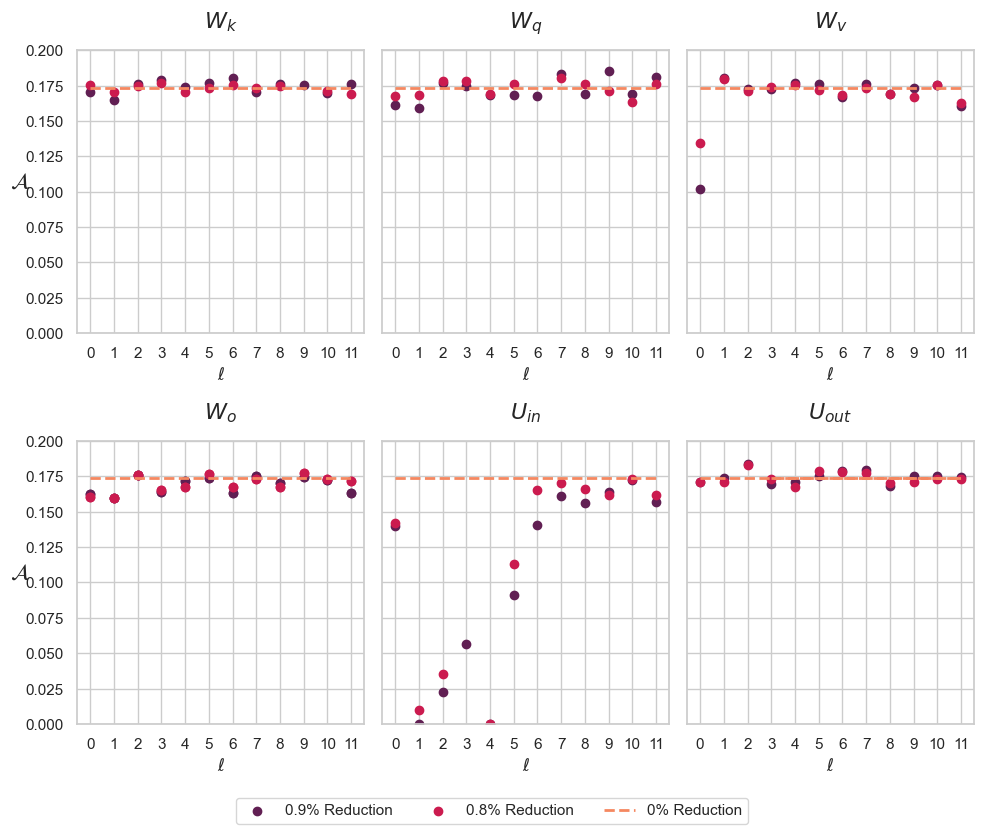

In [353]:
import ast

sns.set(style="whitegrid")
sns.set_palette("muted")

# Custom color palette for the plots
colors = sns.color_palette("rocket", 3)  # Using 3 shades of reddish-purple




blocks = {
    'attention.query_key_value.weight': 0,
    'attention.dense.weight': 1,
    'mlp.dense_h_to_4h.weight': 2,
    'mlp.dense_4h_to_h.weight': 3
}


block_labels = [f"$W_{{kqv}}$", f"$W_o$", f"$U_{{in}}$", f"$U_{{out}}$", ]


metric = 'corrected_final_top1_accuracy'

models = ["pythia160m", "pythia410m"]



for m in range(len(models)):
    df, df_none = collect_data(models[m])
    #df = df[df['rate'] == 0.9]
    blocks_df = df['lname'].unique()
    
    fig, axes = plt.subplots(1, len(blocks_df), figsize=(int(3.5 * len(blocks_df)), 5), sharey=True)

    handles, labels = [], []
    
    for block in blocks_df:

        b = blocks[block]

        ax = axes[b]

        for rate, color in zip([0.9, 0.8, 0], colors):
            
            if rate == 0 and 'edited' not in metric:
                data = df_none[df_none['lname'] == block]
                out = data[metric]
                ax.scatter(data['lnum'], out, label=f'{rate}% Reduction', color=color)
            elif "edited" in metric and rate == 0:
                ax.plot(data['lnum'], data["original_top1_accuracy"], label=f'{rate}% Reduction', color=colors[2], linestyle = "--", linewidth = 2)
            else:
                data = df[(df['lname'] == block) & (df['rate'] == rate)]
                ax.scatter(data['lnum'], data[metric], label=f'{rate}% Reduction', color=color)

        # Collect handles and labels
        handle, label = ax.get_legend_handles_labels()
        handles.extend(handle)
        labels.extend(label)


        if '410' in models[m]:
            ax.set_xticks(range(0, 24, 2))
            ax.set_xticklabels(range(0, 24, 2))
        else:
            ax.set_xticks(range(12))
            ax.set_xticklabels(range(12))

            
        ax.set_title(f"{block_labels[b]}", fontsize=16, y=1.05)
        #ax.set_title(block_labels[b1])
        ax.set_xlabel(f'$\\ell$')
        """if 'final' in metric:
            ax.set_ylim(0, 1)
        else:
            ax.set_ylim(0, 0.2)"""
        
        ax.set_ylim(0, 1)

        if b == 0:
            ax.set_ylabel(f"$\\mathcal{{A}}$", fontsize=18, rotation =0, x=-1)

    fig.legend(handles=handles[:3], labels=labels[:3], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))




    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig(f'outputs/plots/performance_{models[m]}_{metric}.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
    plt.show()




blocks = {
    'attention.self.key': 0,
    'attention.self.query': 1,
    'attention.self.value': 2,
    'attention.output.dense': 3,
    'intermediate.dense.weight': 4,
    'output.dense.weight': 5
}

block_labels = [f"$W_k$", f"$W_q$", f"$W_v$", f"$W_o$", f"$U_{{in}}$", f"$U_{{out}}$", f"$W_{{kqv}}$", f"$W_o$", f"$U_{{in}}$", f"$U_{{out}}$"]

models = ["roberta_base"]

for m in range(len(models)):
    df, df_none = collect_data(models[m])
    #df = df[df['rate'] == 0.9]
    blocks_df = df['lname'].unique()
    
    fig, axes = plt.subplots(2, 3, figsize=(int(3.5 * 3), 8), sharey=True)

    handles, labels = [], []

    for block in blocks_df:

        b = blocks[block]

        a2 = b % 3
        a1 = b // 3

        ax = axes[a1, a2]

        for rate, color in zip([0.9, 0.8, 0], colors):
            if rate == 0 and 'edited' not in metric:
                data = df_none[df_none['lname'] == block]
                if b < 2:
                    data[metric] = data[metric] + 0.04
                out = data[metric]
                ax.scatter(data['lnum'], out, label=f'{rate}% Reduction', color=color)
            elif "edited" in metric and rate == 0:
                ax.plot(data['lnum'], data["original_top1_accuracy"], label=f'{rate}% Reduction', color=colors[2], linestyle = "--", linewidth = 2)
            else:
                data = df[(df['lname'] == block) & (df['rate'] == rate)]
                ax.scatter(data['lnum'], data[metric], label=f'{rate}% Reduction', color=color)

        # Collect handles and labels
        handle, label = ax.get_legend_handles_labels()
        handles.extend(handle)
        labels.extend(label)


        if '410' in models[m]:
            ax.set_xticks(range(0, 24, 2))
            ax.set_xticklabels(range(0, 24, 2))
        else:
            ax.set_xticks(range(12))
            ax.set_xticklabels(range(12))

        ax.set_title(f"{block_labels[b]}", fontsize=16, y= 1.05)
        ax.set_xlabel(f'$\\ell$')


        """if 'final' in metric:
            ax.set_ylim(0, 1)
        else:
            ax.set_ylim(0, 0.2)
        """

        ax.set_ylim(0, 1)
        


        if b == 0 or b == 3:
            ax.set_ylabel(f"$\\mathcal{{A}}$", fontsize=16, rotation =0, x=-1)

    #handles = list(set(handles))
    #labels = list(set(labels))
    fig.legend(handles=handles[:3], labels=labels[:3], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))




    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig(f'outputs/plots/performance_{models[m]}_{metric}.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
    plt.show()




In [299]:
import pickle
from nltk.corpus import stopwords
from nltk import pos_tag


def classify_words(words):
    pos_tags = pos_tag(words)
    function_words = set(stopwords.words('english'))
    
    word_frequencies = {
        'common_nouns': 0,
        'proper_nouns': 0,
        'verbs': 0,
        'modal_verbs': 0,
        'adjectives': 0,
        'adverbs': 0,
        'determiners': 0,
        'conjunctions': 0,
        'prepositions': 0,
        'pronouns': 0,
        'interjections': 0,
        'numerals': 0,
        'function_words': 0
    }
    
    for word, tag in pos_tags:
        if word.lower() in function_words:
            word_frequencies['function_words'] += 1
        elif tag.startswith('NNP'):
            word_frequencies['proper_nouns'] += 1
        elif tag.startswith('NN'):
            word_frequencies['common_nouns'] += 1
        elif tag.startswith('VB'):
            if tag == 'MD':
                word_frequencies['modal_verbs'] += 1
            else:
                word_frequencies['verbs'] += 1
        elif tag.startswith('JJ'):
            word_frequencies['adjectives'] += 1
        elif tag.startswith('RB'):
            word_frequencies['adverbs'] += 1
        elif tag in ('DT', 'PDT', 'WDT'):
            word_frequencies['determiners'] += 1
        elif tag in ('CC', 'IN'):
            word_frequencies['conjunctions'] += 1
        elif tag in ('IN', 'TO'):
            word_frequencies['prepositions'] += 1
        elif tag in ('PRP', 'PRP$', 'WP', 'WP$'):
            word_frequencies['pronouns'] += 1
        elif tag == 'UH':
            word_frequencies['interjections'] += 1
        elif tag == 'CD':
            word_frequencies['numerals'] += 1
    
    return word_frequencies


def get_dataset(model_type):

    with open("data/counterfact", "rb") as f:
        data = pickle.load(f)


    num_dp = len(data)
    dataset = []

    X, y = [], []

    for i in range(num_dp):

        question = data[i]["question"]
        answer = data[i]["gold-answer"]
        assert answer.startswith(" "), f"Found answer that doesn't start with space ${answer}$"
        dataset.append((question, answer))

    
    for i in range(len(dataset)):
        question, answer = dataset[i]

        if model_type == "masked":
            if question.endswith(" "):
                question = f"{question}<mask>."
            else:
                question = f"{question} <mask>."

        X.append(question)
        y.append(answer)

    return X, y

X, y = get_dataset("causal")

cat = classify_words(y)
print(cat)



{'common_nouns': 2943, 'proper_nouns': 54421, 'verbs': 896, 'modal_verbs': 0, 'adjectives': 7293, 'adverbs': 138, 'determiners': 1, 'conjunctions': 15, 'prepositions': 0, 'pronouns': 27, 'interjections': 0, 'numerals': 1, 'function_words': 0}


In [ ]:
table_text= ""

models = ["roberta_base", "pythia160m", "pythia410m"]

labs = ["RoBERTa", "Pythia-160M", "Pythia-410M"]

blocks_d = {
    'attention.dense.weight': 3,
    'mlp.dense_h_to_4h.weight': 4,
    'mlp.dense_4h_to_h.weight': 5, 
    'attention.output.dense': 3,
    'intermediate.dense.weight': 4,
    'output.dense.weight': 5,
    'attention.self.key': 1,
    'attention.self.query': 0,
    'attention.self.value': 2,
    'attention.query_key_value.weight': 6
}

lab = [f'$W_{{q}}$', f'$W_{{k}}$', f'$W_{{v}}$', f'$W_{{o}}$', 
       f'$U_{{in}}$', f'$U_{{out}}$', f'$W_{{qkv}}$']


for m in range(len(models)):
    df, df_none = collect_data(models[m])

    print(models[m])



    table_text += f"& {models[m]}"

    blocks = df['lname'].unique()

    for block in blocks:

        b = blocks_d[block]
        if b == 5:
            
            for rate in [0.8, 0.9]:
                print(rate)
                if rate == 0.8:
                    data = df[(df['lname'] == block) & (df['rate'] == rate)]
                else:
                    table_text += f" & "
                    data = df[(df['lname'] == block) & (df['rate'] == rate)]

                min_l = data[data["lnum"] == 0]["corrected_final_top1_accuracy"].values[0]


                max_diff_spec = data[data["diff_spectral_norm"] == np.max(data["diff_spectral_norm"])]["corrected_final_top1_accuracy"].values[0]
                min_diff_spec = data[data["diff_spectral_norm"] == np.min(data["diff_spectral_norm"])]["corrected_final_top1_accuracy"].values[0]

                max_diff_frob = data[data["diff_frobenius_norm"] == np.max(data["diff_frobenius_norm"])]["corrected_final_top1_accuracy"].values[0]
                min_diff_frob = data[data["diff_frobenius_norm"] == np.min(data["diff_frobenius_norm"])]["corrected_final_top1_accuracy"].values[0]


                if max_diff_spec > min_diff_spec:
                    spec_select = max_diff_spec
                    print("max")
                else: 
                    spec_select = min_diff_spec
                    print("min")

                if max_diff_frob > min_diff_frob:
                    frob_select = max_diff_frob
                    print("max")
                else: 
                    frob_select = min_diff_frob
                    print("min")

                mean_acc = np.mean(df[df['rate'] == rate]["corrected_final_top1_accuracy"])
                best_acc  = np.max(df[df['rate'] == rate]["corrected_final_top1_accuracy"])

                table_text += f" & {rate} & {mean_acc:.4f} & {best_acc:.4f} & {min_l:.4f} & {spec_select:.4f} & {frob_select:.4f} \\\\ \n"

                if rate == 0.9:
                    table_text += "\\hline \n"



print(table_text)

In [356]:
table_text= ""

models = ["roberta_base", "pythia160m", "pythia410m"]

labs = ["RoBERTa", "Pythia-160M", "Pythia-410M"]

blocks_d = {
    'attention.dense.weight': 3,
    'mlp.dense_h_to_4h.weight': 4,
    'mlp.dense_4h_to_h.weight': 5, 
    'attention.output.dense': 3,
    'intermediate.dense.weight': 4,
    'output.dense.weight': 5,
    'attention.self.key': 1,
    'attention.self.query': 0,
    'attention.self.value': 2,
    'attention.query_key_value.weight': 6
}

lab = [f'$W_{{q}}$', f'$W_{{k}}$', f'$W_{{v}}$', f'$W_{{o}}$', 
       f'$U_{{in}}$', f'$U_{{out}}$', f'$W_{{qkv}}$']


for m in range(len(models)):
    df, df_none = collect_data(models[m])

    print(models[m])



    table_text += f"& {models[m]}"

    blocks = df['lname'].unique()

    for block in blocks:

        b = blocks_d[block]
        if b == 5:
            
            for rate in [0.8, 0.9]:
                print(rate)
                if rate == 0.8:
                    data = df[(df['lname'] == block) & (df['rate'] == rate)]
                else:
                    table_text += f" & "
                    data = df[(df['lname'] == block) & (df['rate'] == rate)]

                min_l = data[data["lnum"] == 0]["corrected_final_top1_accuracy"].values[0]


                max_diff_spec = data[data["diff_spectral_norm"] == np.max(data["diff_spectral_norm"])]["corrected_final_top1_accuracy"].values[0]
                min_diff_spec = data[data["diff_spectral_norm"] == np.min(data["diff_spectral_norm"])]["corrected_final_top1_accuracy"].values[0]

                max_diff_frob = data[data["diff_frobenius_norm"] == np.max(data["diff_frobenius_norm"])]["corrected_final_top1_accuracy"].values[0]
                min_diff_frob = data[data["diff_frobenius_norm"] == np.min(data["diff_frobenius_norm"])]["corrected_final_top1_accuracy"].values[0]


                if max_diff_spec > min_diff_spec:
                    spec_select = max_diff_spec
                    print("max")
                else: 
                    spec_select = min_diff_spec
                    print("min")

                if max_diff_frob > min_diff_frob:
                    frob_select = max_diff_frob
                    print("max")
                else: 
                    frob_select = min_diff_frob
                    print("min")

                mean_acc = np.mean(df[df['rate'] == rate]["corrected_final_top1_accuracy"])
                best_acc  = np.max(df[df['rate'] == rate]["corrected_final_top1_accuracy"])

                table_text += f" & {rate} & {mean_acc:.4f} & {best_acc:.4f} & {min_l:.4f} & {spec_select:.4f} & {frob_select:.4f} \\\\ \n"

                if rate == 0.9:
                    table_text += "\\hline \n"



print(table_text)

roberta_base
0.8
max
max
0.9
max
max
pythia160m
0.8
min
min
0.9
min
min
pythia410m
0.8
min
min
0.9
min
min
& roberta_base & 0.8 & 0.5134 & 0.6760 & 0.6400 & 0.6514 & 0.6514 \\ 
 &  & 0.9 & 0.4773 & 0.6171 & 0.5553 & 0.5780 & 0.5780 \\ 
\hline 
& pythia160m & 0.8 & 0.5140 & 0.6806 & 0.6128 & 0.6384 & 0.6384 \\ 
 &  & 0.9 & 0.4664 & 0.6038 & 0.5189 & 0.5189 & 0.5753 \\ 
\hline 
& pythia410m & 0.8 & 0.5924 & 0.7060 & 0.7060 & 0.6677 & 0.6677 \\ 
 &  & 0.9 & 0.5446 & 0.6489 & 0.6213 & 0.6213 & 0.6110 \\ 
\hline 



In [357]:
a = [0.6514, 0.5780, 0.6384, 0.5753, 0.6677, 0.6110]
b = [0.5134, 0.4773, 0.5140, 0.4664, 0.5924, 0.5446]

c = []

for i in range(len(a)):
    c.append(a[i]-b[i])

print(np.min(c), np.max(c), np.mean(c))

0.06640000000000001 0.138 0.10228333333333332


In [355]:
table_text= ""

models = ["roberta_base", "pythia160m", "pythia410m"]

labs = ["RoBERTa", "Pythia-160M", "Pythia-410M"]

blocks_d = {
    'attention.dense.weight': 3,
    'mlp.dense_h_to_4h.weight': 4,
    'mlp.dense_4h_to_h.weight': 5, 
    'attention.output.dense': 3,
    'intermediate.dense.weight': 4,
    'output.dense.weight': 5,
    'attention.self.key': 1,
    'attention.self.query': 0,
    'attention.self.value': 2,
    'attention.query_key_value.weight': 6
}

lab = [f'$W_{{q}}$', f'$W_{{k}}$', f'$W_{{v}}$', f'$W_{{o}}$', 
       f'$U_{{in}}$', f'$U_{{out}}$', f'$W_{{qkv}}$']

diff = []

for m in range(len(models)):
    df, df_none = collect_data(models[m])

    blocks = df['lname'].unique()

    for block in blocks:

        b = blocks_d[block]

        table_text += f"& {lab[b]}"

        for rate in [0, 0.8]:
            if rate == 0:
                data = df_none[df_none['lname'] == block]
            else:
                table_text += f" & "
                data = df[(df['lname'] == block) & (df['rate'] == rate)]

            
            mean_acc = np.mean(data["corrected_final_top1_accuracy"])
            best_acc  = np.max(data["corrected_final_top1_accuracy"])
            worst_acc  = np.min(data["corrected_final_top1_accuracy"])

            mean_per = np.mean(data["correct_final_perplexity"])
            best_per = np.min(data["correct_final_perplexity"])
            worst_per  = np.max(data["correct_final_perplexity"])

            d = best_acc - worst_acc
            diff.append(d)

            print(models[m], block, rate, d)

            table_text += f" & {rate} & {mean_acc:.4f} & {best_acc:.4f} & {mean_per:.4f} & {best_per:.4f} \\\\ \n"

            if rate == 0.8:
                table_text += "\\hline \n"

#print(table_text)

print(np.mean(diff))
print(np.max(diff))


roberta_base attention.output.dense 0 0.18008729100000004
roberta_base attention.output.dense 0.8 0.094781108
roberta_base attention.self.key 0 0.11807108
roberta_base attention.self.key 0.8 0.117204647
roberta_base attention.self.query 0 0.14089754699999996
roberta_base attention.self.query 0.8 0.13154783999999997
roberta_base attention.self.value 0 0.1257356639999999
roberta_base attention.self.value 0.8 0.08156972299999998
roberta_base intermediate.dense.weight 0 0.22928424399999997
roberta_base intermediate.dense.weight 0.8 0.204809491
roberta_base output.dense.weight 0 0.30508859899999996
roberta_base output.dense.weight 0.8 0.208981613
pythia160m attention.dense.weight 0 0.104855684
pythia160m attention.dense.weight 0.8 0.11435609000000002
pythia160m attention.query_key_value.weight 0 0.125793698
pythia160m attention.query_key_value.weight 0.8 0.17109540700000003
pythia160m mlp.dense_4h_to_h.weight 0 0.32275655099999995
pythia160m mlp.dense_4h_to_h.weight 0.8 0.23060230599999998


In [312]:
models = ["roberta_base", "pythia160m", "pythia410m"]



dependent_vars = [
    'corrected_final_top1_accuracy',
    'edited_top1_accuracy',
    'final_change_from_reduction',
    'diff_edit_common_nouns',
    'diff_edit_proper_nouns',
    'diff_edit_verbs',
    #'diff_edit_modal_verbs',
    'diff_edit_adjectives',
    'diff_edit_adverbs',
    #'diff_edit_determiners',
    'diff_edit_conjunctions',
    #'diff_edit_prepositions',
    'diff_edit_pronouns',
    #'diff_edit_interjections',
    #'diff_edit_numerals',
    'diff_edit_function_words',
    'diff_final_common_nouns',
    'diff_final_proper_nouns',
    'diff_final_verbs',
    #'diff_final_modal_verbs',
    'diff_final_adjectives',
    'diff_final_adverbs',
    #'diff_final_determiners',
    'diff_final_conjunctions',
    #'diff_final_prepositions',
    'diff_final_pronouns',
    #'diff_final_interjections',
    #'diff_final_numerals',
    #'diff_final_function_words'
]



indep_1 = ['frobenius_norm', 'spectral_norm', 'nuclear_norm', 'condition_number']

indep_2 = ['original_', 'edited_', 'diff_']


blocks = {
    'attention.dense.weight': 0,
    'mlp.dense_h_to_4h.weight': 1,
    'mlp.dense_4h_to_h.weight': 2, 
    'attention.output.dense': 0,
    'intermediate.dense.weight': 1,
    'output.dense.weight': 2
}

#                   d                   i1 i2  m  b  corr and pval
results = np.zeros((len(dependent_vars), 4, 3, 3, 3, 2))


for m in range(len(models)):
    df, df_none = collect_data(models[m])
    df = df[df['rate']==0.9]
    for d in range(len(dependent_vars)):
        for i1 in range(len(indep_1)):
            for i2 in range(len(indep_2)):
                for b, n in blocks.items():
                    subset = df[df['lname'] == b]
                    ind = indep_2[i2]+indep_1[i1]
                    dep = dependent_vars[d]
                    valid_data = subset[[ind, dep]].dropna()
                    try:
                        corr, pval = pearsonr(valid_data[ind], valid_data[dep])
                        results[d, i1, i2, m, n, 0] = corr
                        results[d, i1, i2, m, n, 1] = pval
                    except:continue




roberta.encoder.layer.0.attention.self.key.weight
roberta.encoder.layer.1.attention.self.key.weight
roberta.encoder.layer.2.attention.self.key.weight
roberta.encoder.layer.3.attention.self.key.weight
roberta.encoder.layer.4.attention.self.key.weight
roberta.encoder.layer.5.attention.self.key.weight
roberta.encoder.layer.6.attention.self.key.weight
roberta.encoder.layer.7.attention.self.key.weight
roberta.encoder.layer.8.attention.self.key.weight
roberta.encoder.layer.9.attention.self.key.weight
roberta.encoder.layer.10.attention.self.key.weight
roberta.encoder.layer.11.attention.self.key.weight
roberta.encoder.layer.0.attention.self.query.weight
roberta.encoder.layer.1.attention.self.query.weight
roberta.encoder.layer.2.attention.self.query.weight
roberta.encoder.layer.3.attention.self.query.weight
roberta.encoder.layer.4.attention.self.query.weight
roberta.encoder.layer.5.attention.self.query.weight
roberta.encoder.layer.6.attention.self.query.weight
roberta.encoder.layer.7.attention.

C:\Users\will-\AppData\Local\Temp\ipykernel_5972\4002844383.py:69: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid_data[ind], valid_data[dep])
C:\Users\will-\AppData\Local\Temp\ipykernel_5972\4002844383.py:69: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid_data[ind], valid_data[dep])
C:\Users\will-\AppData\Local\Temp\ipykernel_5972\4002844383.py:69: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid_data[ind], valid_data[dep])
C:\Users\will-\AppData\Local\Temp\ipykernel_5972\4002844383.py:69: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid_data[ind], valid_data[dep])
C:\Users\will-\AppData\Local\Temp\ipykernel_5972\4002844383.py:69: ConstantInputWarning: An input array is constant; the cor

gpt_neox.layers.0.attention.dense.weight
gpt_neox.layers.0.attention.query_key_value.weight
gpt_neox.layers.0.mlp.dense_4h_to_h.weight
gpt_neox.layers.0.mlp.dense_h_to_4h.weight
gpt_neox.layers.1.attention.dense.weight
gpt_neox.layers.1.attention.query_key_value.weight
gpt_neox.layers.1.mlp.dense_4h_to_h.weight
gpt_neox.layers.1.mlp.dense_h_to_4h.weight
gpt_neox.layers.10.attention.dense.weight
gpt_neox.layers.10.attention.query_key_value.weight
gpt_neox.layers.10.mlp.dense_4h_to_h.weight
gpt_neox.layers.10.mlp.dense_h_to_4h.weight
gpt_neox.layers.11.attention.dense.weight
gpt_neox.layers.11.attention.query_key_value.weight
gpt_neox.layers.11.mlp.dense_4h_to_h.weight
gpt_neox.layers.11.mlp.dense_h_to_4h.weight
gpt_neox.layers.12.attention.dense.weight
gpt_neox.layers.12.attention.query_key_value.weight
gpt_neox.layers.12.mlp.dense_4h_to_h.weight
gpt_neox.layers.12.mlp.dense_h_to_4h.weight
gpt_neox.layers.13.attention.dense.weight
gpt_neox.layers.13.attention.query_key_value.weight
gpt_

In [313]:

def format_corr(corr, pval):
    if pval < 0.1:
        pval_formatted = f"{pval:.3e}".split("e")
        pval_formatted = f"{pval_formatted[0]} \\times 10^{{{int(pval_formatted[1])}}}"
        return f" & {corr:.4f} & \\colorbox{{mycolor}}{{${pval_formatted}$}} "
    else:
        pval_formatted = f"{pval:.3e}".split("e")
        try:
            pval_formatted = f"{pval_formatted[0]} \\times 10^{{{int(pval_formatted[1])}}}"
        except:
            pval_formatted = pval
        return f" & {corr:.4f} & ${pval_formatted}$ "

In [314]:
table_code = ""

for d in range(len(dependent_vars)):
    if "edit" in dependent_vars[d]:
        text1 = f"\\textbf{{without}} subsequent fine-tuning"
    else:
        text1 = f"with subsequent fine-tuning"
    if d > 2:
        word = dependent_vars[d].split("_") 
        if len(word) > 3:
            # Join all parts from the second element onwards
            word = ' '.join(word[2:])
        else:
            word = word[-1]
        text2 = f"change in frequency of \\textit{{{word}}} token prediction (induced by the low rank intervention; {text1})"
    elif "change" in dependent_vars[d]:
        text2 = f"the change in top-1 accuracy of the model (due to the low rank intervention; {text1})"
    else:
        text2 = f"the top-1 accuracy of the model"

    caption = f"Pearson correlation coefficients and p-values for the relationship between the {text2} and weight matrix properties. With a reduction rate of 0.9."

    table_code += f"\\begin{{table}}\n\\begin{{footnotesize}}\n\\begin{{center}}\n"
    table_code += f"\\renewcommand{{\\arraystretch}}{{1.25}}\n"
    table_code += f"\\caption{{{caption}}}\n"
    table_code += f"\\label{{table:{dependent_vars[d]}_{indep_1[i1]}}} \\\\ \n"
    table_code += f"\\vspace{{0.4cm}}\n"
    table_code += f"\\begin{{tabular}}{{|p{{1cm}} p{{2.3cm}} || m{{1.5cm}} | m{{1.5cm}} | m{{1.5cm}}  |m{{1.5cm}}  m{{1.5cm}} m{{1.5cm}} }}\n"
    
    for i1 in range(len(indep_1)):

        table_code += f"\\hline\n"

        if indep_1[i1] == "condition_number":
            table_code += f"& & \\multicolumn{{2}}{{m|}}{{$\\kappa ( \\mathcal{{W}} ) $}} & \\multicolumn{{2}}{{m|}}{{$\\kappa ( \\hat{{\\mathcal{{W}}}} ) $}} & \\multicolumn{{2}}{{m|}}{{$\\kappa ( \\mathcal{{W}} - \\hat{{\\mathcal{{W}}}} ) $}} \\\\ \n"
        else:
            if indep_1[i1] == "frobenius_norm":
                s = "F"
            if indep_1[i1] == "spectral_norm":
                s = "2"
            if indep_1[i1] == "nuclear_norm":
                s = "*"
            table_code += f"& & \\multicolumn{{2}}{{m|}}{{$\\lVert \\mathcal{{W}} \\rVert_{{{s}}}$}} & \\multicolumn{{2}}{{m|}}{{$\\lVert \\hat{{\\mathcal{{W}}}} \\rVert_{{{s}}}$}} & \\multicolumn{{2}}{{m|}}{{$\\lVert \\mathcal{{W}} - \\hat{{\\mathcal{{W}}}} \\rVert_{{{s}}}$}} \\\\ \n"


        table_code += f"$\\mathcal{{W}}$ & Model & $r$ & $p$ & $r$ & $p$ & $r$ & $p$ \\\\ \n"
        table_code += f"\\hline\n\\hline\n"


        for b in [0, 1, 2]:
            if b == 0:
                table_code += f"$W_{{o}}$ "
            elif b == 1:
                table_code += f"$U_{{in}}$ "
            elif b == 2:
                table_code += f"$U_{{out}}$ "
            for m in [0, 1, 2]:
                if m == 0:
                    table_code += f" & RoBERTa"
                elif m == 1:
                    table_code += f" & Pythia-160M"
                elif m == 2:
                    table_code += f" & Pythia-410M" 

                for i2 in [0, 1, 2]:
                    if i2 == 1 and i1 == 1:
                        table_code += f" & - & - "
                    else:
                        table_code += format_corr(results[d, i1, i2, m, b, 0], results[d, i1, i2, m, b, 1])
                table_code += f"\\\\ \n"
            table_code += f"\\hline \n"

        #table_code += f"\\vspace{{0.2cm}}\n\\hline \n"

    table_code += "\\end{tabular}\n\\end{center}\n\\end{footnotesize}\n\\end{table}\n\n\n"

print(table_code)


\begin{table}
\begin{footnotesize}
\begin{center}
\renewcommand{\arraystretch}{1.25}
\caption{Pearson correlation coefficients and p-values for the relationship between the the top-1 accuracy of the model and weight matrix properties. With a reduction rate of 0.9.}
\label{table:corrected_final_top1_accuracy_condition_number} \\ 
\vspace{0.4cm}
\begin{tabular}{|p{1cm} p{2.3cm} || m{1.5cm} | m{1.5cm} | m{1.5cm}  |m{1.5cm}  m{1.5cm} m{1.5cm} }
\hline
& & \multicolumn{2}{m|}{$\lVert \mathcal{W} \rVert_{F}$} & \multicolumn{2}{m|}{$\lVert \hat{\mathcal{W}} \rVert_{F}$} & \multicolumn{2}{m|}{$\lVert \mathcal{W} - \hat{\mathcal{W}} \rVert_{F}$} \\ 
$\mathcal{W}$ & Model & $r$ & $p$ & $r$ & $p$ & $r$ & $p$ \\ 
\hline
\hline
$W_{o}$  & RoBERTa & 0.0390 & $8.563 \times 10^{-1}$  & 0.4347 & \colorbox{mycolor}{$3.378 \times 10^{-2}$}  & -0.5249 & \colorbox{mycolor}{$8.448 \times 10^{-3}$} \\ 
 & Pythia-160M & 0.5750 & \colorbox{mycolor}{$5.047 \times 10^{-2}$}  & 0.6621 & \colorbox{mycolor}{$1.900 

In [183]:
table_code = ""

for d in range(len(dependent_vars)):
    if "edit" in dependent_vars[d]:
        text1 = f"the models following intervention but \\textbf{{without}} subsequent fine-tuning"
    else:
        text1 = f"the models following intervention and subsequent fine-tuning"
    for i1 in range(len(indep_1)):
        if d > 2:
            word = dependent_vars[d].split("_") 
            if len(word) > 3:
                # Join all parts from the second element onwards
                word = ' '.join(word[2:])
            else:
                word = word[-1]
            text2 = f"change in frequency of {word} token prediction (induced by the low rank intervention)"
        elif "change" in dependent_vars[d]:
            text2 = f"the drop in top-1 accuracy of the model (due to the low rank intervention)"
        else:
            text2 = f"the top-1 accuracy of the model"

        caption = f"The Pearson correlation coefficients and p-values for the relationship between the {text2} and the {" ".join(indep_1[i1].split("_"))} of the weight matrices (across all layers of each given transformer block). This table displays the results for {text1}. The p-values that fall below the significance threshold of 0.1 are shaded in grey."

        table_code += f"\\begin{{table}}\n\\begin{{small}}\n\\begin{{center}}\n"
        table_code += f"\\renewcommand{{\\arraystretch}}{{1.5}}\n"
        table_code += f"\\caption{{{caption}}}\n"
        table_code += f"\\label{{table:{dependent_vars[d]}_{indep_1[i1]}}} \\\\ \n"
        table_code += f"\\vspace{{0.4cm}}\n"
        table_code += f"\\begin{{tabular}}{{|p{{1cm}} p{{2.3cm}} || m{{1.5cm}} | m{{1.5cm}} | m{{1.5cm}}  |m{{1.5cm}}  m{{1.5cm}} m{{1.5cm}} }}\n"
        table_code += f"\\hline\n"

        if indep_1[i1] == "condition_number":
            table_code += f"& & \\multicolumn{{2}}{{m|}}{{$\\kappa \\left( \\mathcal{{W}} \\right) $}} & \\multicolumn{{2}}{{m|}}{{$\\kappa \\left( \\hat{{\\mathcal{{W}}}} \\right) $}} & \\multicolumn{{2}}{{m|}}{{$\\kappa \\left( \\mathcal{{W}} - \\hat{{\\mathcal{{W}}}} \\right) $}} \\\\ \n"
        else:
            if indep_1[i1] == "frobenius_norm":
                s = "F"
            if indep_1[i1] == "spectral_norm":
                s = "2"
            if indep_1[i1] == "nuclear_norm":
                s = "*"
            table_code += f"& & \\multicolumn{{2}}{{m|}}{{$\\lVert \\mathcal{{W}} \\rVert_{{*}}$}} & \\multicolumn{{2}}{{m|}}{{$\\lVert \\hat{{\\mathcal{{W}}}} \\rVert_{{*}}$}} & \\multicolumn{{2}}{{m|}}{{$\\lVert \\mathcal{{W}} - \\hat{{\\mathcal{{W}}}} \\rVert_{{*}}$}} \\\\ \n"


        table_code += f"$\\mathcal{{W}}$ & Model & $r$ & $p$ & $r$ & $p$ & $r$ & $p$ \\\\ \n"
        table_code += f"\\hline\n\\hline\n"


        for b in [0, 1, 2]:
            if b == 0:
                table_code += f"$W_{{o}}$ "
            elif b == 1:
                table_code += f"$U_{{in}}$ "
            elif b == 2:
                table_code += f"$U_{{out}}$ "
            for m in [0, 1, 2]:
                if m == 0:
                    table_code += f" & RoBERTa"
                elif m == 1:
                    table_code += f" & Pythia-160M"
                elif m == 2:
                    table_code += f" & Pythia-410M" 

                for i2 in [0, 1, 2]:
                    table_code += format_corr(results[d, i1, i2, m, b, 0], results[d, i1, i2, m, b, 1])
                table_code += f"\\\\ \n"
            table_code += f"\\hline \n"

        table_code += 

    table_code += "\\end{tabular}\n\\end{center}\n\\end{small}\n\\end{table}\n\n\n"

print(table_code)



\begin{table}
\begin{small}
\begin{center}
\renewcommand{\arraystretch}{1.5}
\caption{The Pearson correlation coefficients and p-values for the relationship between the the top-1 accuracy of the model and the frobenius norm of the weight matrices (across all layers of each given transformer block). This table displays the results for the models following intervention and subsequent fine-tuning. The p-values that fall below the significance threshold of 0.1 are shaded in grey.}
\label{table:final_top1_accuracy_frobenius_norm} \\ 
\vspace{0.4cm}
\begin{tabular}{|p{1cm} p{2.3cm} || m{1.5cm} | m{1.5cm} | m{1.5cm}  |m{1.5cm}  m{1.5cm} m{1.5cm} }
\hline
& & \multicolumn{2}{m|}{$\lVert \mathcal{W} \rVert_{*}$} & \multicolumn{2}{m|}{$\lVert \hat{\mathcal{W}} \rVert_{*}$} & \multicolumn{2}{m|}{$\lVert \mathcal{W} - \hat{\mathcal{W}} \rVert_{*}$} \\ 
$\mathcal{W}$ & Model & $r$ & $p$ & $r$ & $p$ & $r$ & $p$ \\ 
\hline
\hline
$W_{o}$  & RoBERTa & 0.0390 & 8.563e-01  & 0.4347 & \colorbox{mycolor}{

In [170]:
models = ["roberta_base", "pythia160m", "pythia410m"]

dependent_vars = [
    #'final_top1_accuracy',
    #'final_change_from_reduction',
    'diff_edit_common_nouns',
    'diff_edit_proper_nouns',
    'diff_edit_verbs',
    #'diff_edit_modal_verbs',
    'diff_edit_adjectives',
    'diff_edit_adverbs',
    'diff_edit_determiners',
    'diff_edit_conjunctions',
    #'diff_edit_prepositions',
    'diff_edit_pronouns',
    #'diff_edit_interjections',
    #'diff_edit_numerals',
    'diff_edit_function_words',
    'diff_final_common_nouns',
    'diff_final_proper_nouns',
    'diff_final_verbs',
    #'diff_final_modal_verbs',
    'diff_final_adjectives',
    'diff_final_adverbs',
    'diff_final_determiners',
    'diff_final_conjunctions',
    #'diff_final_prepositions',
    'diff_final_pronouns',
    #'diff_final_interjections',
    #'diff_final_numerals',
    'diff_final_function_words'
]


independent_vars = [
    'lnum',
    #'relative_error_x', 
    'original_frobenius_norm',
    'original_spectral_norm', 
    'original_nuclear_norm', 
    'original_condition_number', 
    #'original_shannon_entropy',
    'diff_frobenius_norm', 
    'diff_spectral_norm', 
    'diff_nuclear_norm', 
    'diff_condition_number', 
    #'diff_shannon_entropy', 
    #'energy_retained',
    'edited_frobenius_norm',
    'edited_spectral_norm',
    'edited_nuclear_norm',
    'edited_condition_number',
    #'edited_cut_off_sv',
    #'edited_shannon_entropy'
]

indep_1 = ['frobenius_norm', 'spectral_norm', 'nuclear_norm', 'condition_number']

indep_2 = ['original_', 'edited_', 'diff_']


blocks = {
    'attention.dense.weight': 0,
    'mlp.dense_h_to_4h.weight': 1,
    'mlp.dense_4h_to_h.weight': 2, 
    'attention.output.dense': 0,
    'intermediate.dense.weight': 1,
    'output.dense.weight': 2
}

#                   d                   i1 i2  m  b  corr and pval
results = np.zeros((len(dependent_vars), 4, 3, 3, 3, 2))


In [172]:
for model in models:
    df, df_none = collect_data(model)
    #df_analysis = analyse_metrics(model, df, dependent_vars, independent_vars)
    #plot_metrics(df, model, dependent_vars, independent_vars, sorted_blocks)

    df = df[df['rate'] == 0.8]
    grouped = df.groupby(['lname'])

    for block, group in grouped:

        if block[0] in sorted_blocks:

            #print(f"     {block}")
            
            for dep_var in dependent_vars:
                for indep_var in independent_vars:

                    valid_data = group[[indep_var, dep_var]].dropna()
                    try: 
                        pearson_corr, pearson_pval = pearsonr(valid_data[indep_var], valid_data[dep_var])

                        #if pearson_pval < 0.09:
                        print(f"{model},{dep_var},{indep_var},{pearson_pval},{pearson_corr}")
                    except:
                        #print(f"ERROR:     {dep_var}   {indep_var}")
                        x=1





            



#analysis_tables_corr = generate_analysis_tables(models, dependent_vars, independent_vars, "corr")
#analysis_tables_pval = generate_analysis_tables(models, dependent_vars, independent_vars, "pval")
#
#for dep_var, table in analysis_tables_corr.items():
#    table.to_csv(f"{dep_var}_analysis_table_corr.csv", index=True)
#for dep_var, table in analysis_tables_pval.items():
#    table.to_csv(f"outputs/results/analysis/grouped/{dep_var}_pval.csv", index=True)


#for model in models:
#    df, df_none = collect_data(model)
#    #df_analysis = analyse_metrics(model, df, dependent_vars, independent_vars)
#    plot_metrics(df, model, dependent_vars, independent_vars, sorted_blocks)

roberta_base,diff_edit_common_nouns,lnum,0.08841646433787961,0.3553035065917354
roberta_base,diff_edit_common_nouns,original_frobenius_norm,0.20962687078637804,0.26564218669770534
roberta_base,diff_edit_common_nouns,original_spectral_norm,0.3983053589044754,-0.1806317866315252
roberta_base,diff_edit_common_nouns,original_nuclear_norm,0.020710731382598352,0.46923628218802227
roberta_base,diff_edit_common_nouns,original_condition_number,0.02015459848332718,0.47106357454503034
roberta_base,diff_edit_common_nouns,diff_frobenius_norm,0.00791975129592598,0.5285905734993257
roberta_base,diff_edit_common_nouns,diff_spectral_norm,0.036117105662594795,0.4296953373509576
roberta_base,diff_edit_common_nouns,diff_nuclear_norm,0.05261784026062218,0.40025068767798405
roberta_base,diff_edit_common_nouns,diff_condition_number,0.038876074576714596,0.4241198552609062
roberta_base,diff_edit_common_nouns,edited_frobenius_norm,0.6653165898731355,0.09307766422434058
roberta_base,diff_edit_common_nouns,edited

C:\Users\will-\AppData\Local\Temp\ipykernel_37932\2060796102.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(valid_data[indep_var], valid_data[dep_var])
C:\Users\will-\AppData\Local\Temp\ipykernel_37932\2060796102.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(valid_data[indep_var], valid_data[dep_var])
C:\Users\will-\AppData\Local\Temp\ipykernel_37932\2060796102.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(valid_data[indep_var], valid_data[dep_var])
C:\Users\will-\AppData\Local\Temp\ipykernel_37932\2060796102.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(valid_data[indep_var], valid_data[dep_var])
C:\Users\will-\A

roberta_base,diff_final_common_nouns,lnum,0.5535393462067719,-0.2009450899475988
roberta_base,diff_final_common_nouns,original_frobenius_norm,0.6748416622068127,0.14302138593414854
roberta_base,diff_final_common_nouns,original_spectral_norm,0.6835813041885932,0.13899420577993343
roberta_base,diff_final_common_nouns,original_nuclear_norm,0.6646377714250647,0.1477443905063589
roberta_base,diff_final_common_nouns,original_condition_number,0.036483260933033834,-0.6332388104210381
roberta_base,diff_final_common_nouns,diff_frobenius_norm,0.6782139158237938,0.14146553155233701
roberta_base,diff_final_common_nouns,diff_spectral_norm,0.7931847040746205,0.08966620829222752
roberta_base,diff_final_common_nouns,diff_nuclear_norm,0.6248958224561091,0.1663752331979801
roberta_base,diff_final_common_nouns,diff_condition_number,0.5977825305369892,-0.17932569837241089
roberta_base,diff_final_common_nouns,edited_frobenius_norm,0.6850223227257054,0.13833174759892808
roberta_base,diff_final_common_nouns,e

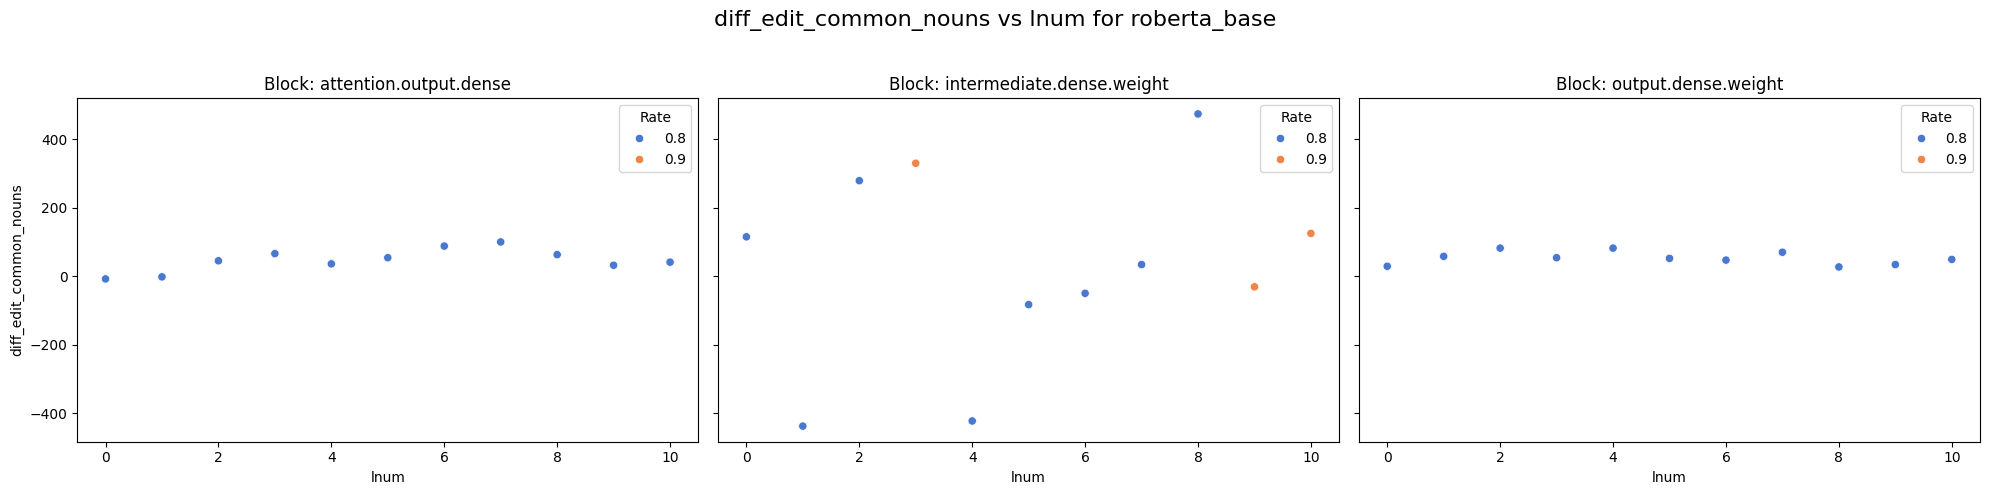

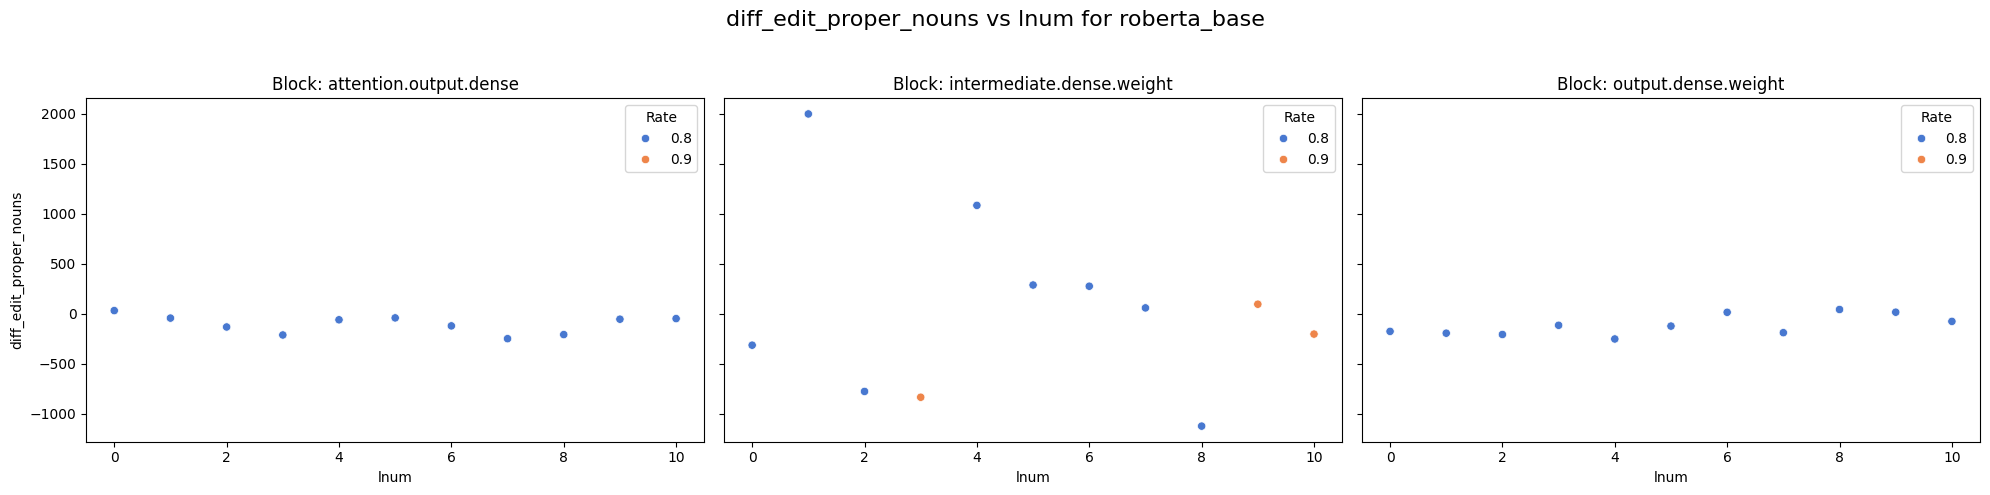

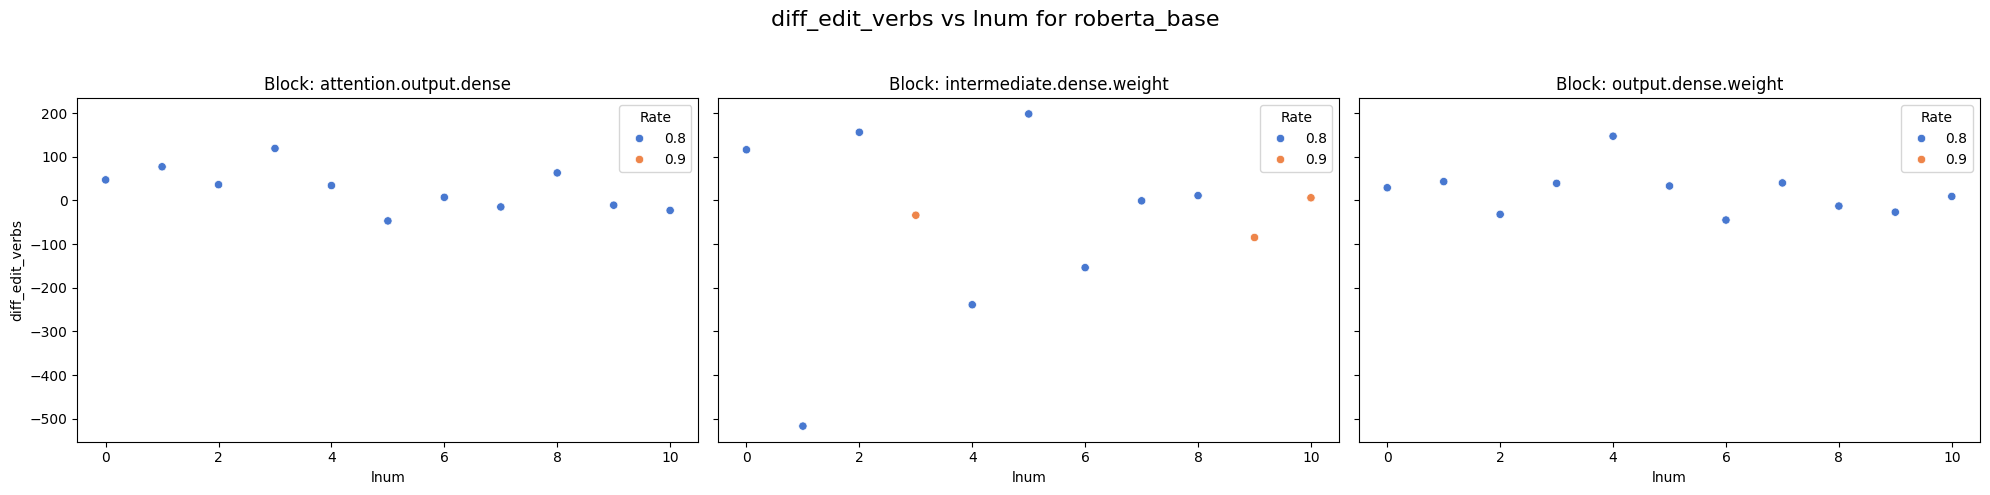

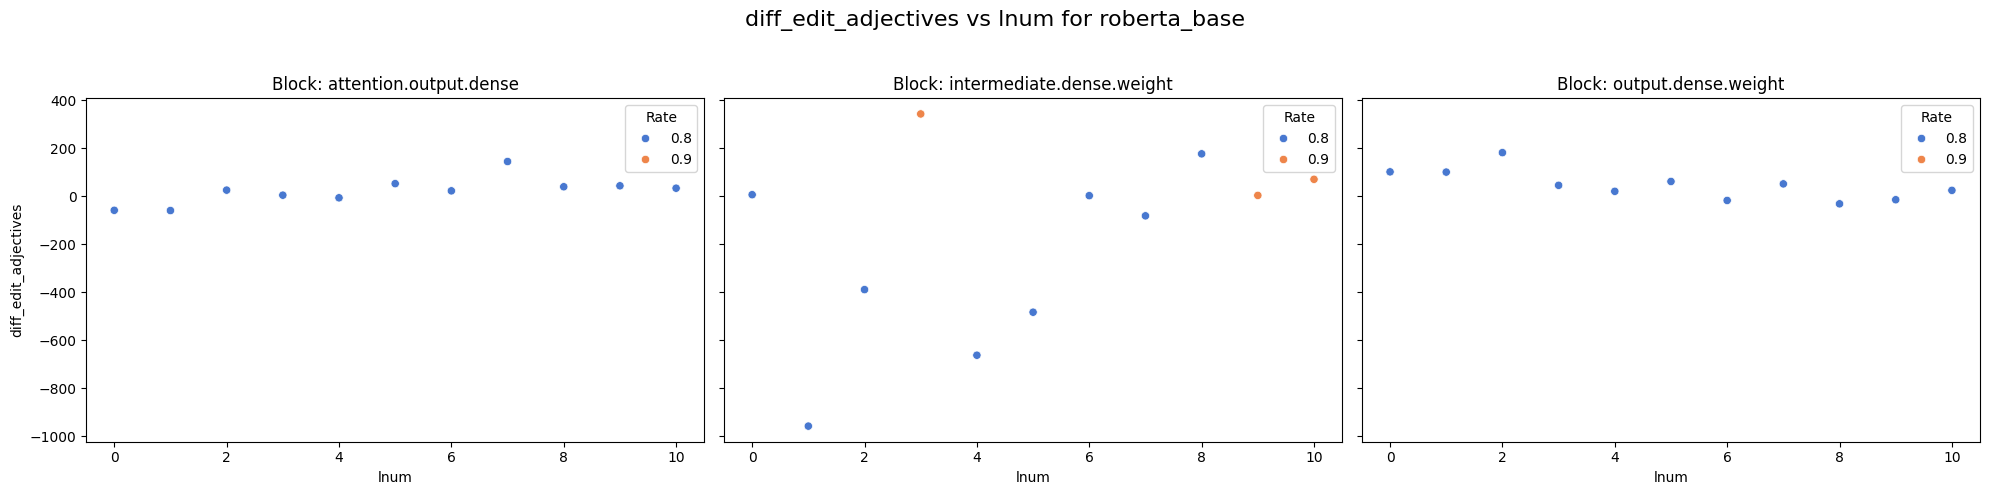

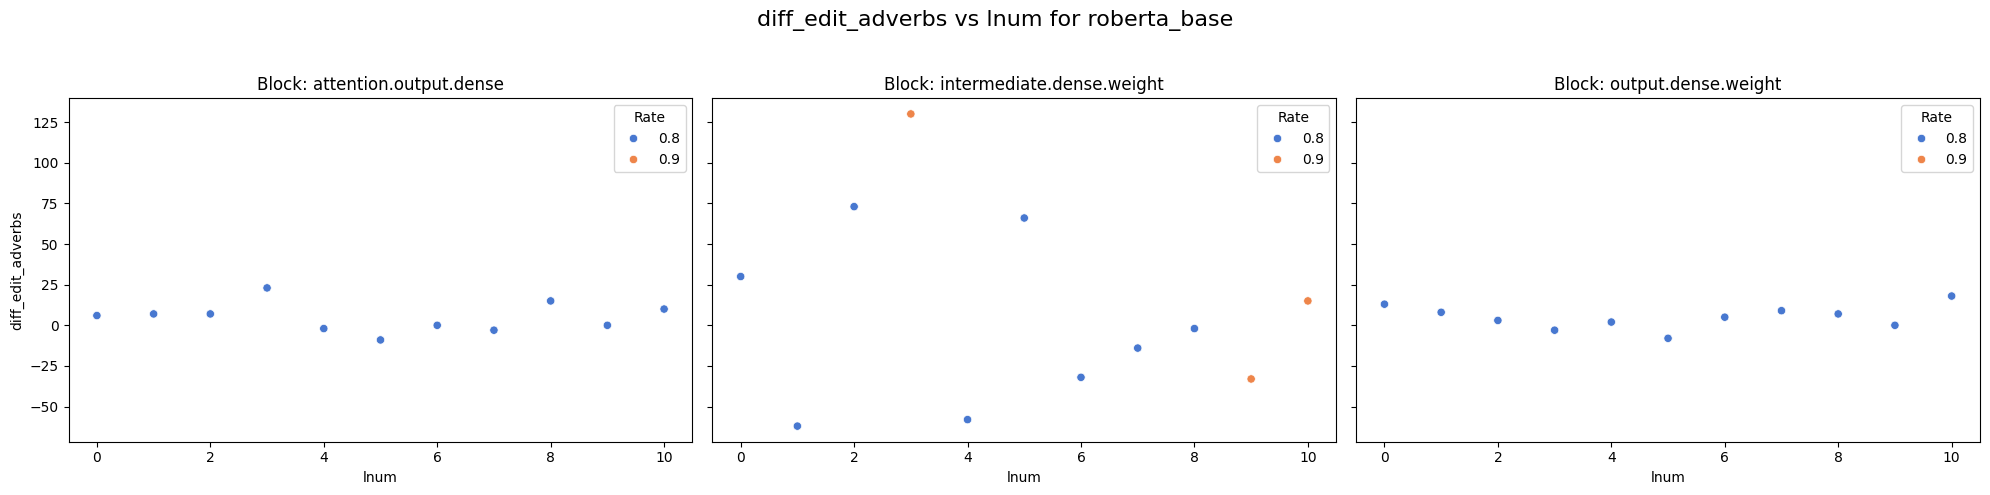

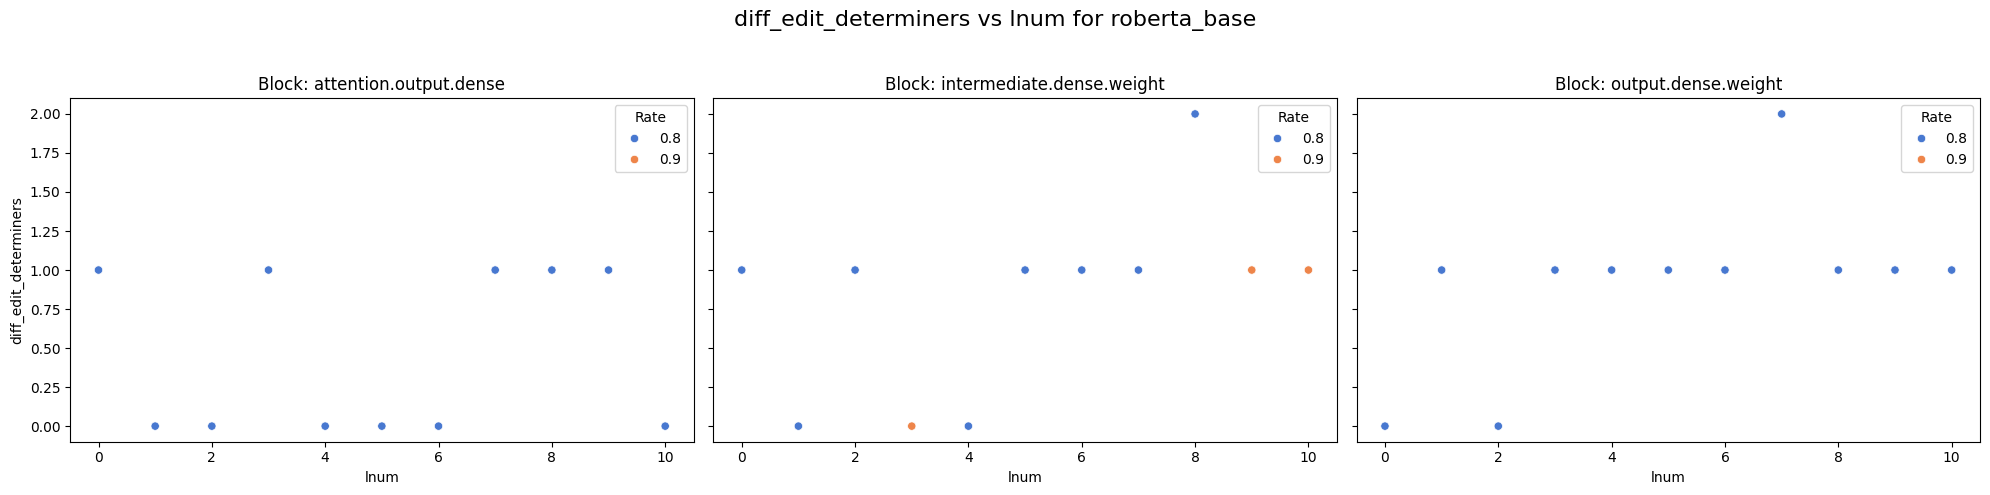

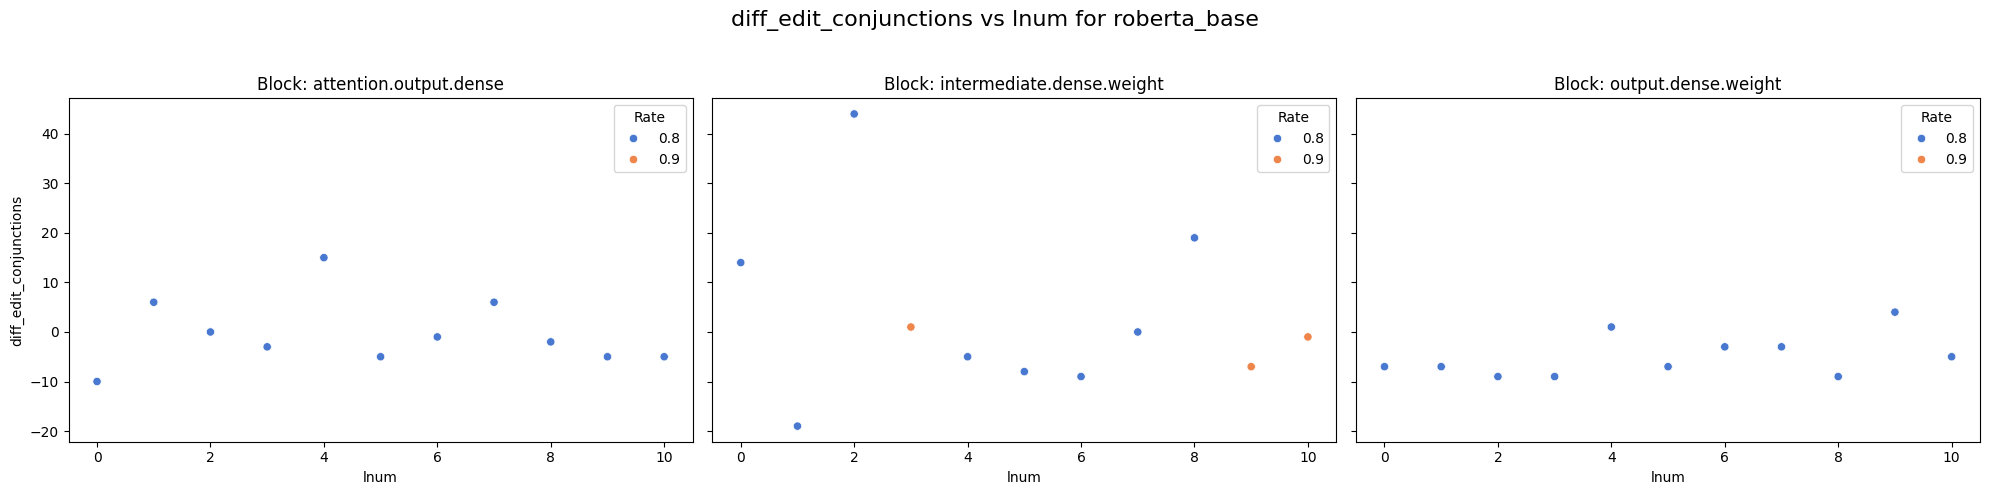

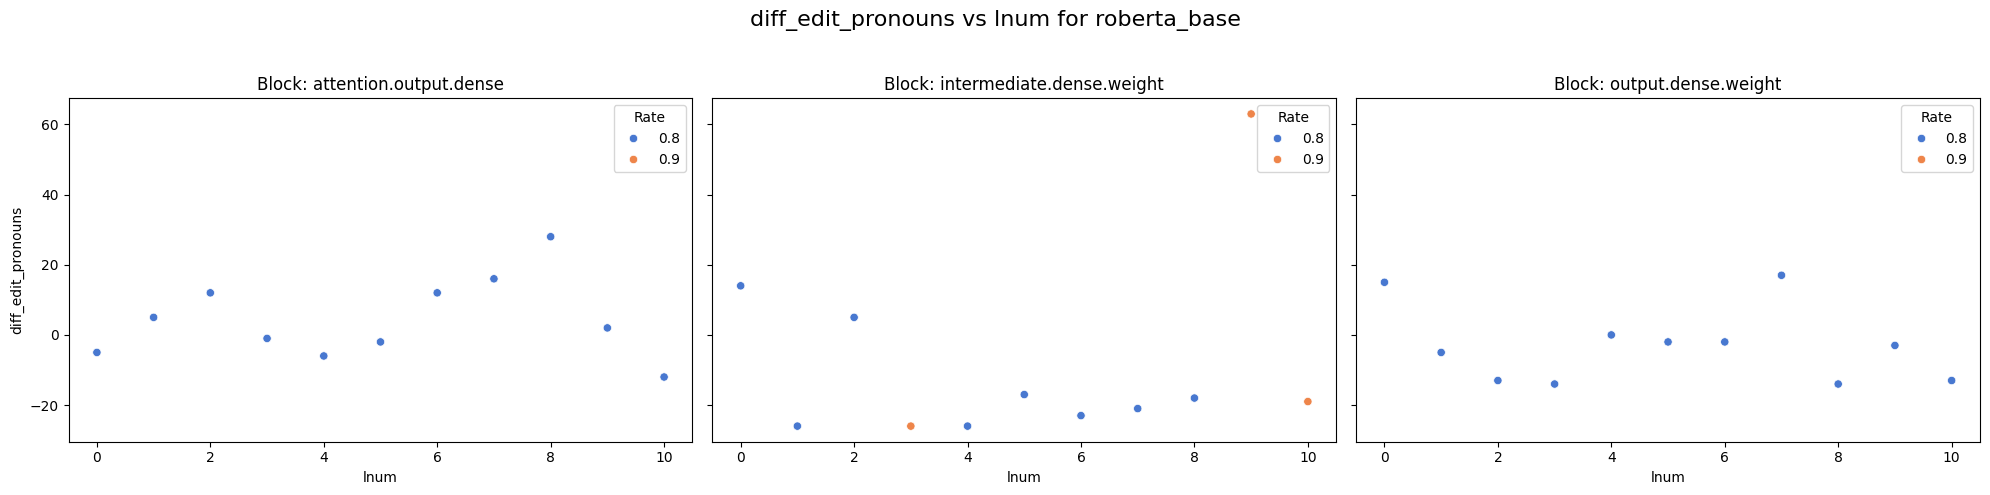

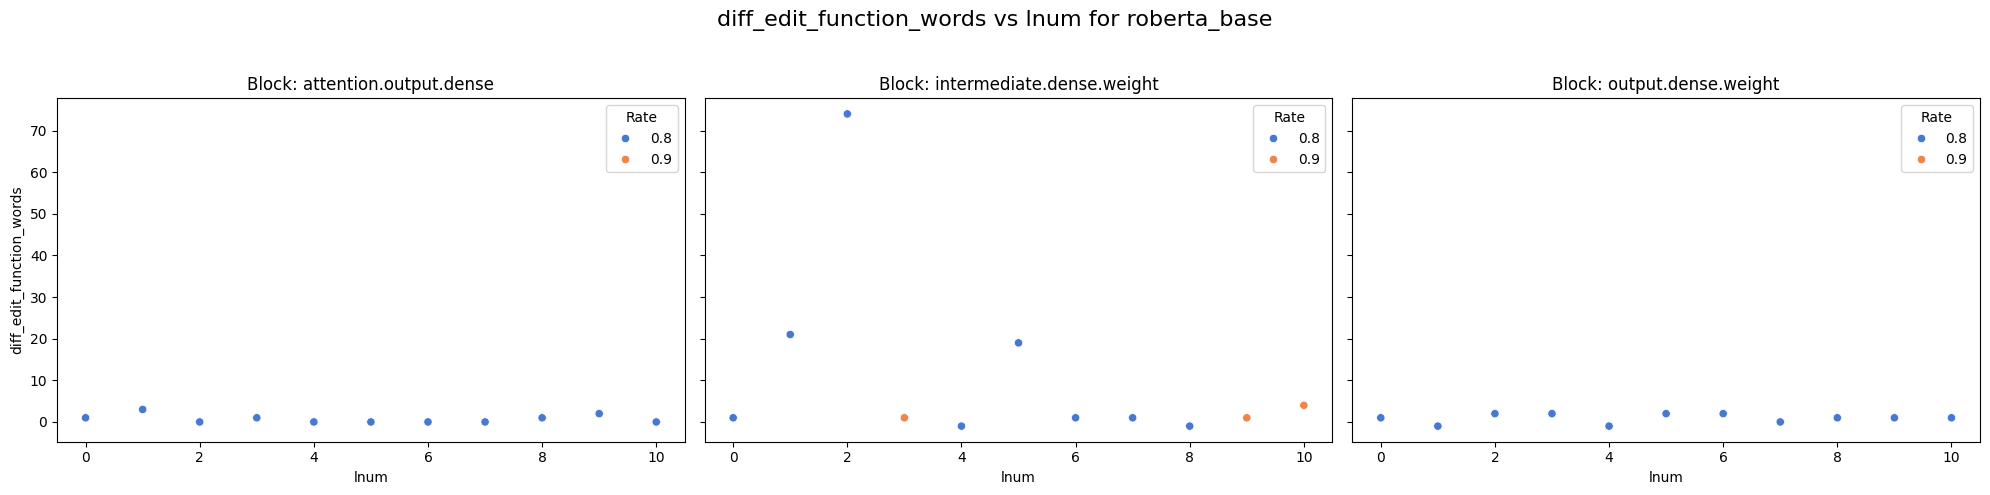

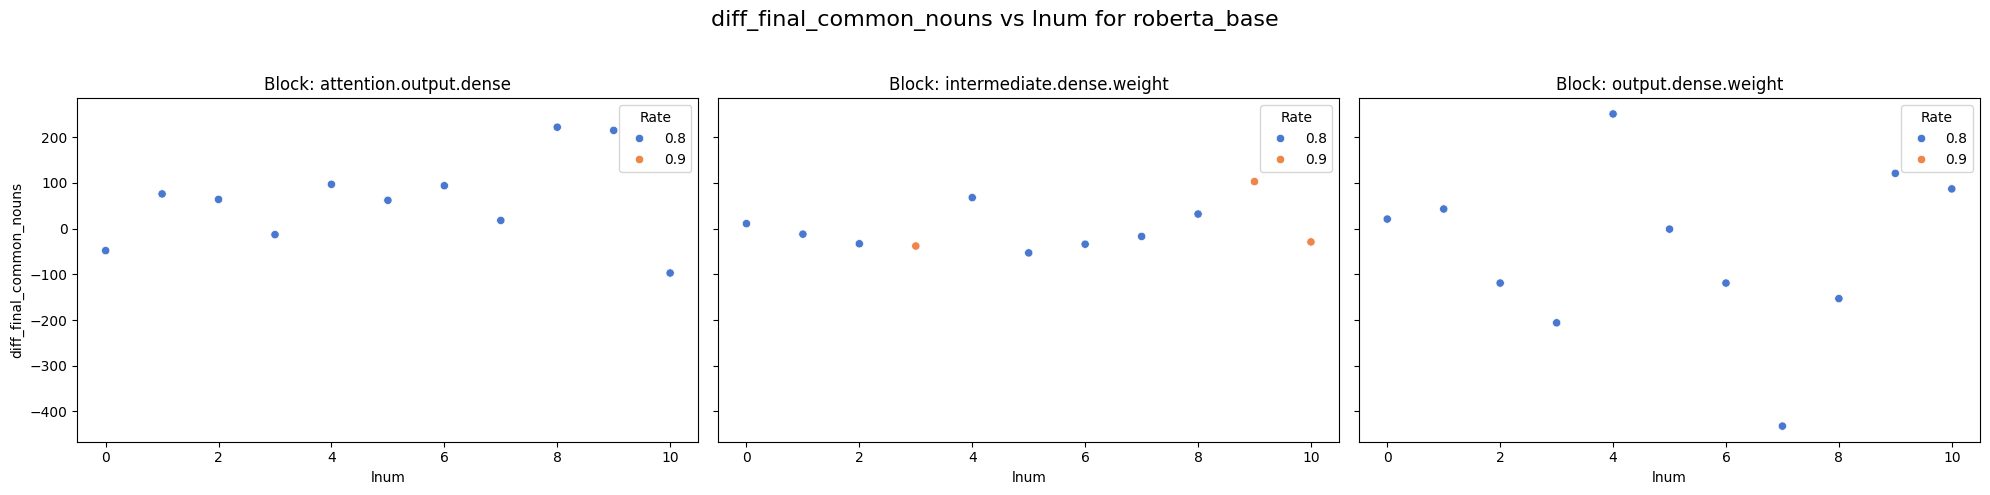

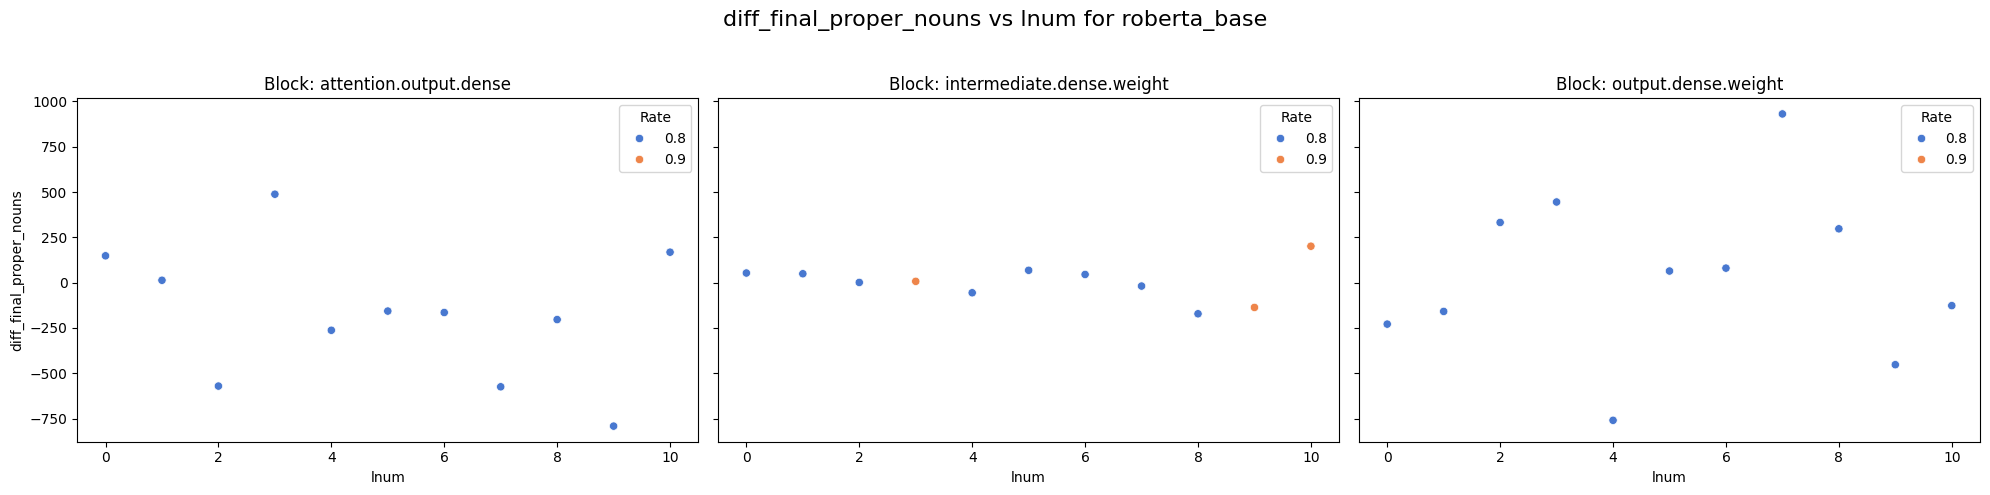

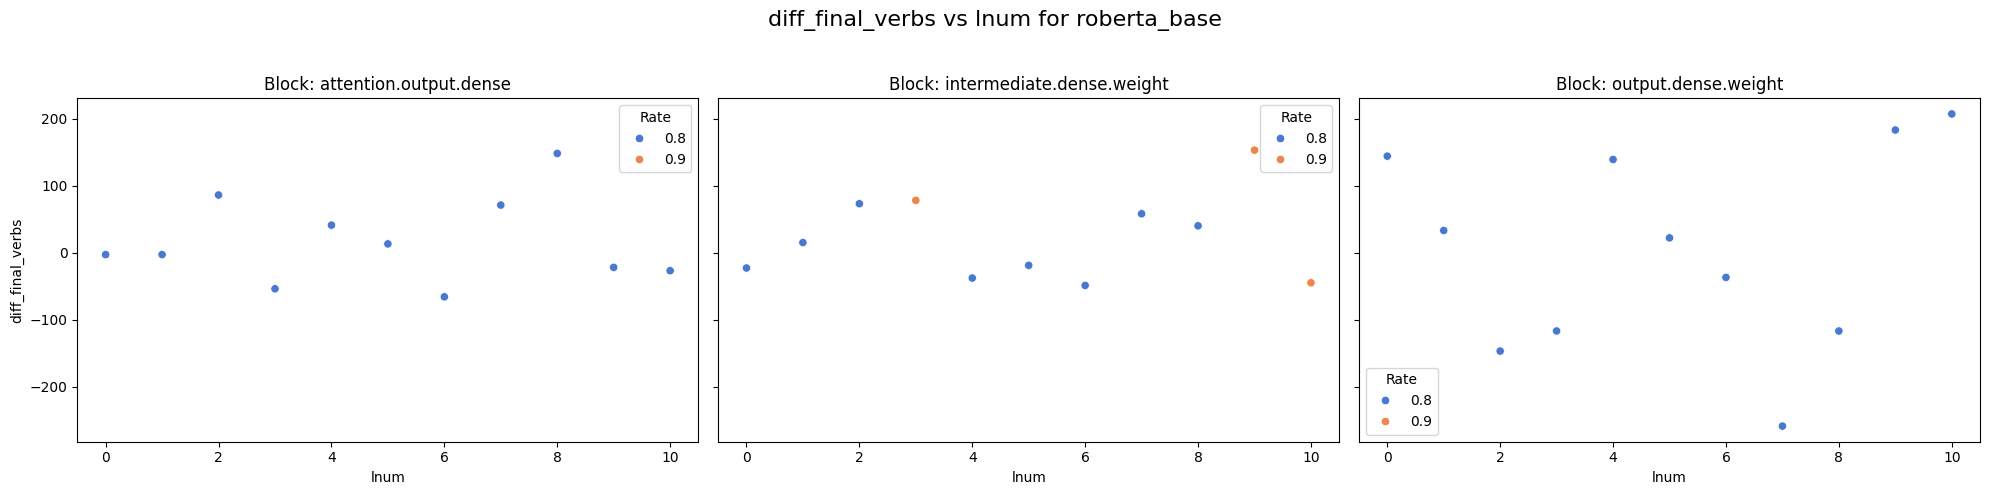

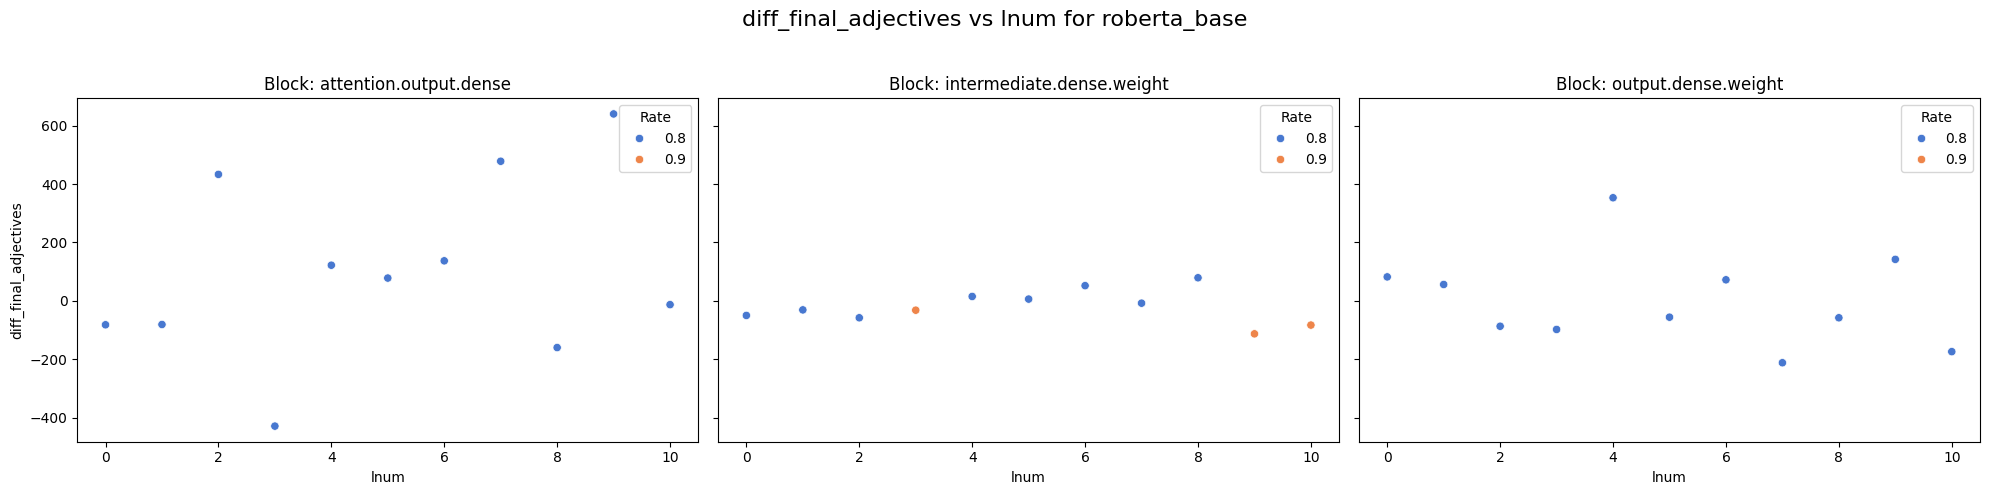

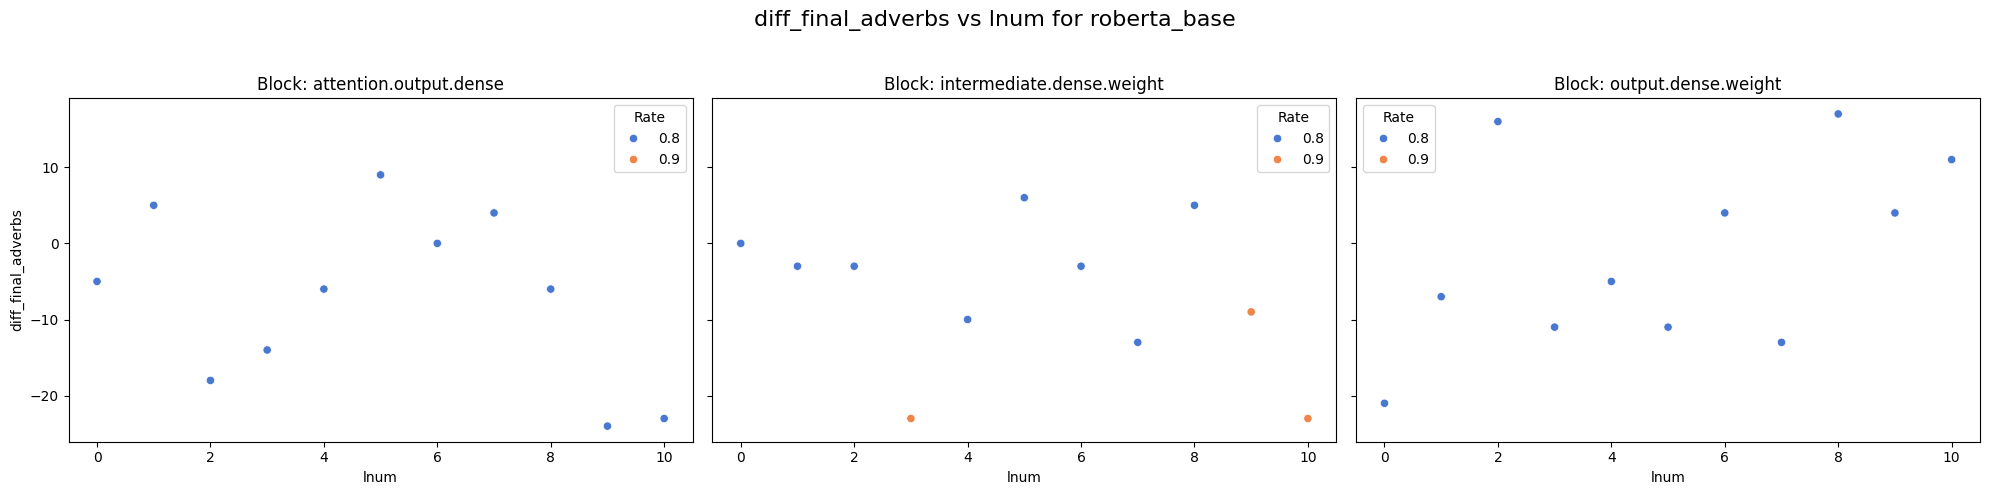

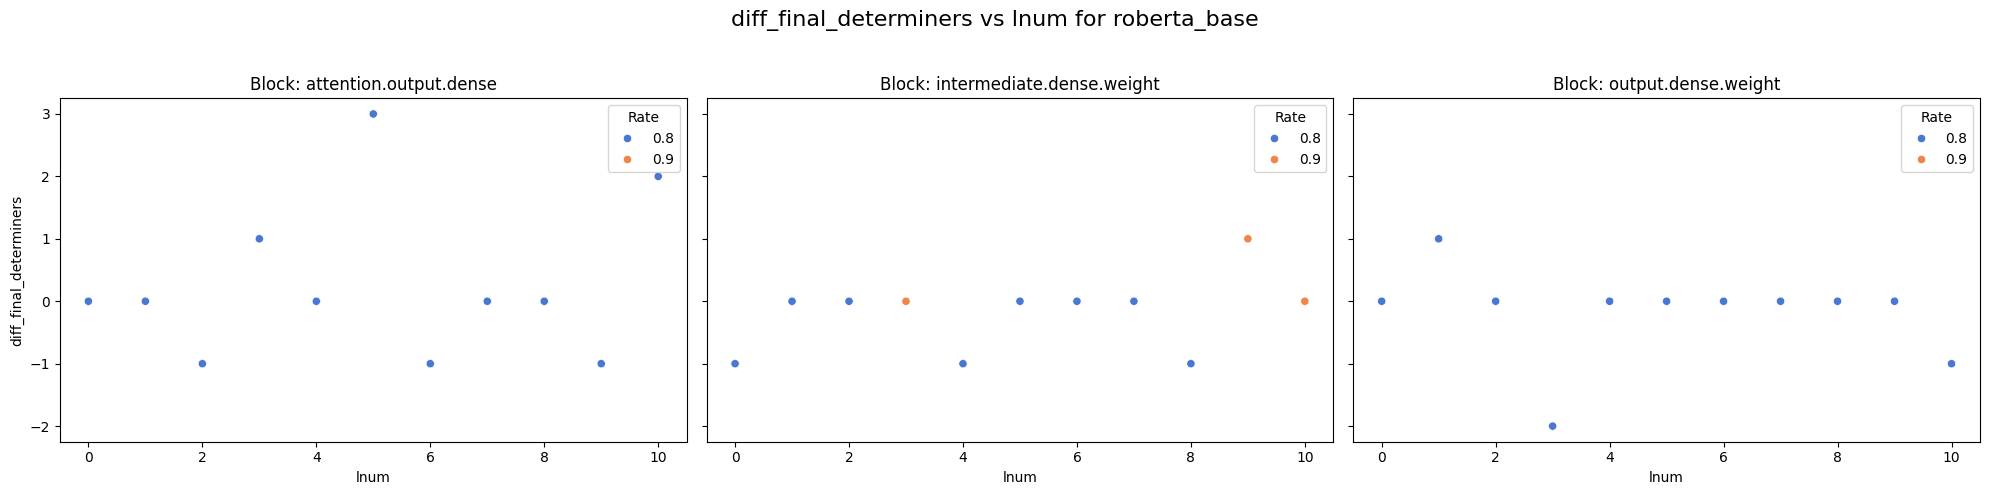

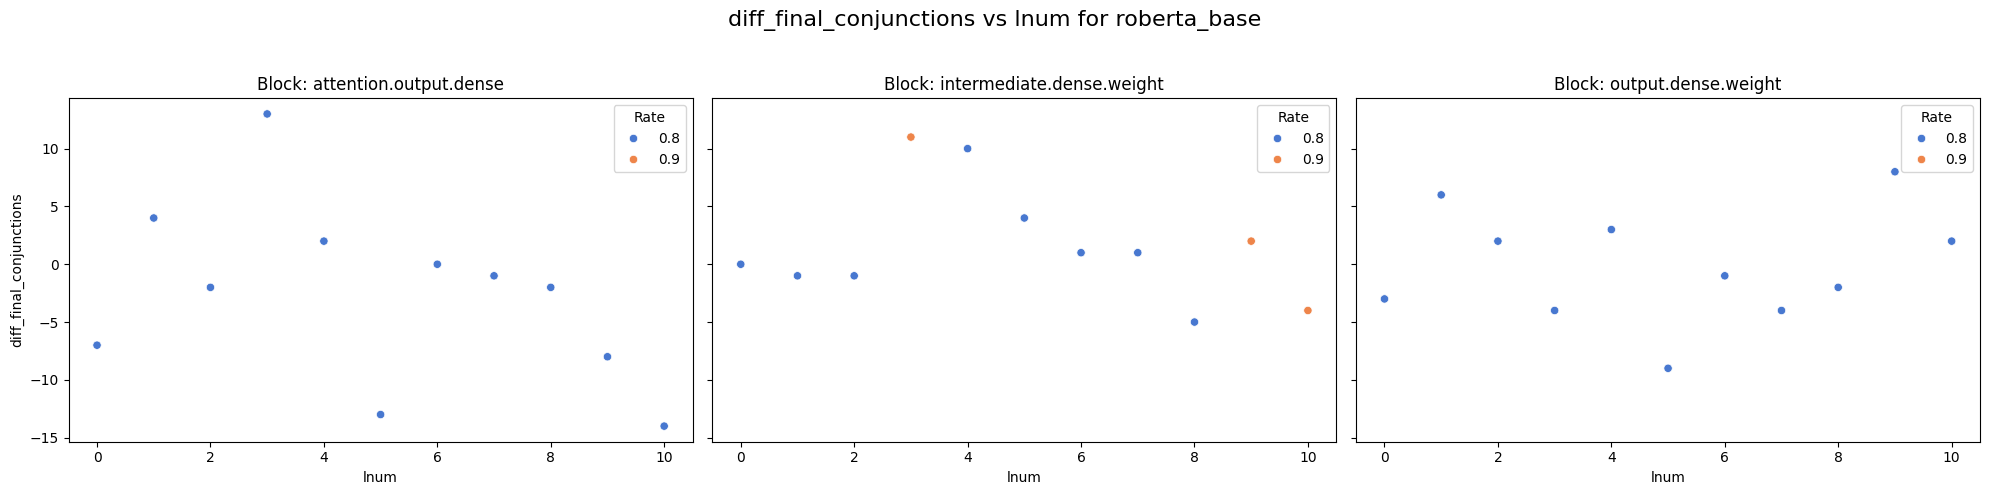

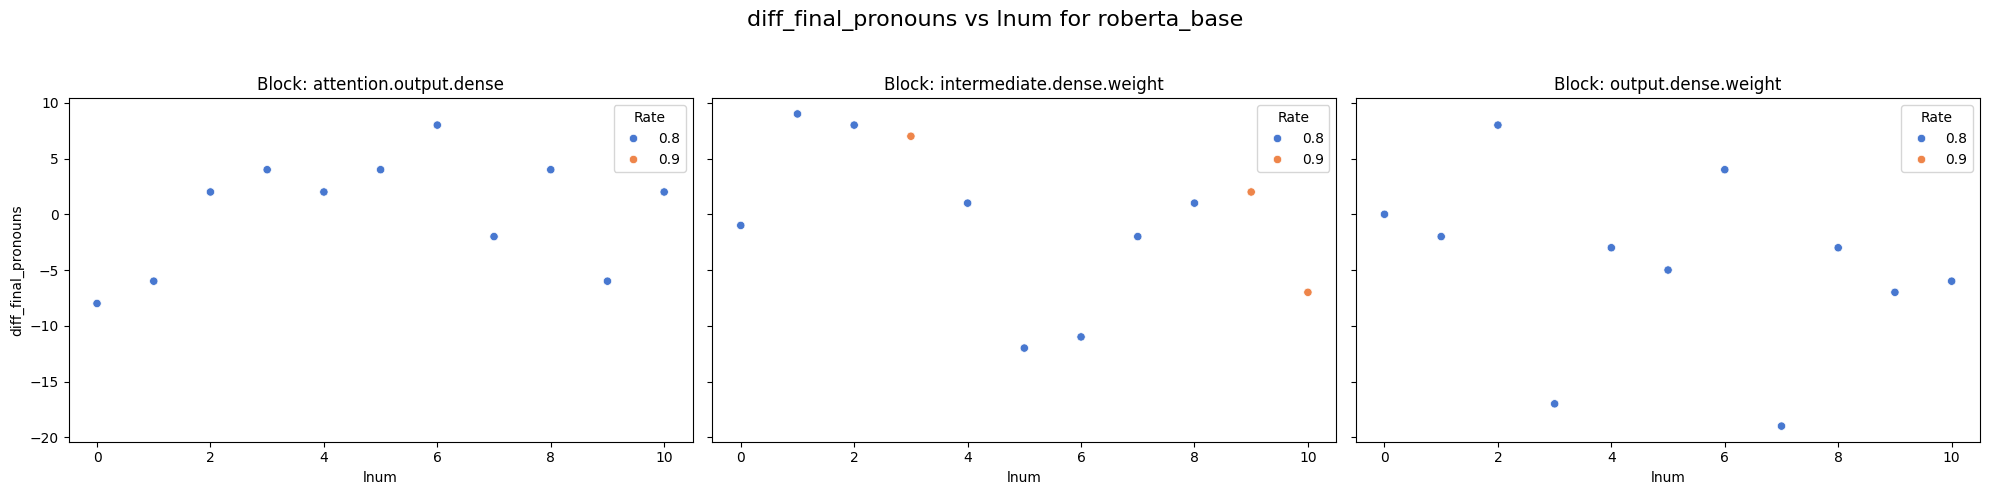

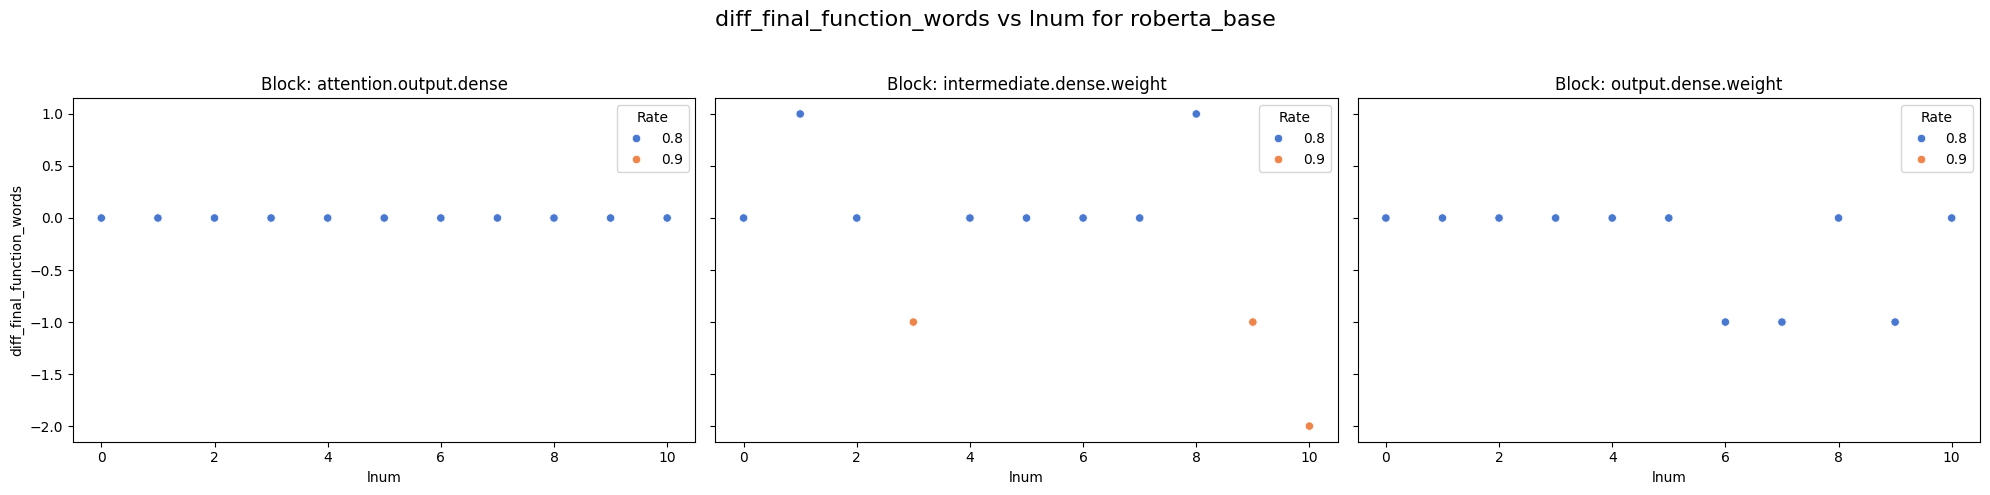

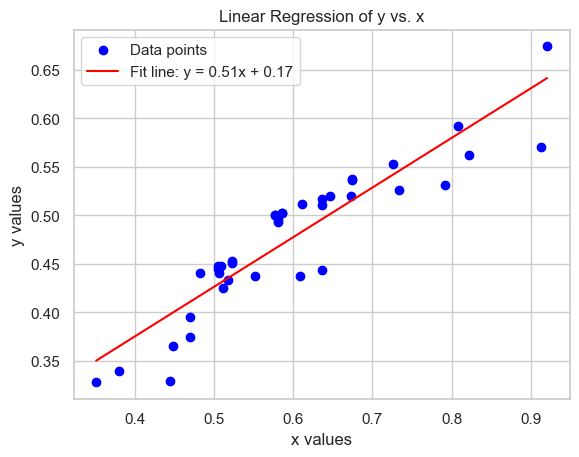

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the full list of x and y values based on the provided data
x = np.array([
    0.470140061, 0.444682695, 0.470140061, 0.482777499, 0.351323813, 0.672856122,
    0.581033198, 0.504904421, 0.611265721, 0.581033198, 0.504904421, 0.67390544,
    0.586492693, 0.522681996, 0.635749806, 0.576759889, 0.635749806, 0.920434326,
    0.912131028, 0.608665237, 0.821448667, 0.79197652, 0.551804371, 0.67390544,
    0.808431042, 0.586492693, 0.733351582, 0.522681996, 0.511124291, 0.635749806,
    0.726416959, 0.576759889, 0.645954043, 0.508767127, 0.518226196, 0.44856061,
    0.506014569, 0.380035586
])

y = np.array([
    0.395529197, 0.329683698, 0.374695864, 0.440085158, 0.327706813, 0.520529197,
    0.494981752, 0.448296837, 0.51140511, 0.493309002, 0.444343066, 0.536192214,
    0.502585158, 0.452554745, 0.516879562, 0.500456204, 0.444190998, 0.674270073,
    0.570711679, 0.437804136, 0.562195864, 0.53086983, 0.4375, 0.537864964,
    0.592305353, 0.502585158, 0.525699513, 0.450577859, 0.424726277, 0.511100973,
    0.55276764, 0.500912409, 0.520225061, 0.447688565, 0.433850365, 0.36526764,
    0.440541363, 0.339568127
])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a range of x values for plotting the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = slope * x_values + intercept

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plotting the regression line
plt.plot(x_values, y_values, color='red', label=f'Fit line: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Linear Regression of y vs. x')

# Add a legend
plt.legend()

# Display the plot
plt.show()


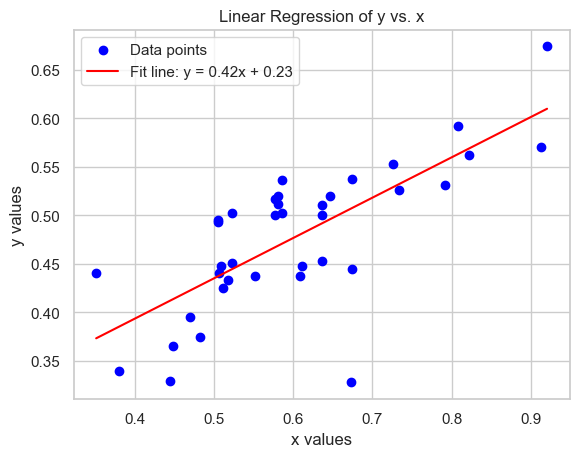

In [238]:
# Create a range of x values for plotting the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = slope * x_values + intercept

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plotting the regression line
plt.plot(x_values, y_values, color='red', label=f'Fit line: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Linear Regression of y vs. x')

# Add a legend
plt.legend()

# Display the plot
plt.show()